# Data analysis for machine learning

In this notebook we will explore how to use data analysis for machine learning.This is my first time exploring and creating ai-model for loan default predictions. So please take the infromation from this notebook with a grain of salt as I am still in the process of learning and getting better. 

We will use Goggle's Good Data Analysis [Good Data Analysis](https://developers.google.com/machine-learning/guides/good-data-analysis) for inspiration and a guide how to preprocess this data. 

---

About the data.
The data was taken from Kaggle [Loan Default Dataset](https://www.kaggle.com/datasets/yasserh/loan-default-dataset)


Since the data was provided with no-description about the column names let's just pop the column names and a sample of the data into ChatGPT to get a brief about the meaning of column names.

---

To learn a bit more about column descriptions refer to obsidian notes [Dataset Introduction](../notes_obsidian/Dataset_Introduction.md). Make sure to check out the whole notebook if you are new to the topic of machine learning.

  

The first thing is first we need to find [correlated values](../notes_obsidian/Regression%20analysis/Correlation.md). We already know the target variable let's see if we can find some correlation within different values with Status column.

# Preperations

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
# Keep all imports in one place
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/raw/Loan_Default.csv')
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

There is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. For now we can not tell which features are the most relevant to us, so let's find this out by finding correlated values. ref. [note: Correlation](../notes_obsidian/Regression_analysis/Correlation.md)

However, we don't need `ID` and `year` column for our analysis as these columns do not contribute to predictive modeling. Let's remove it.


In [4]:
# Removing ID column
columns_to_drop = ['ID', 'year']
data = data.drop(columns=columns_to_drop, axis=1) # axis=1 for columns

Now, lets have a look how `Status` is distributed. 

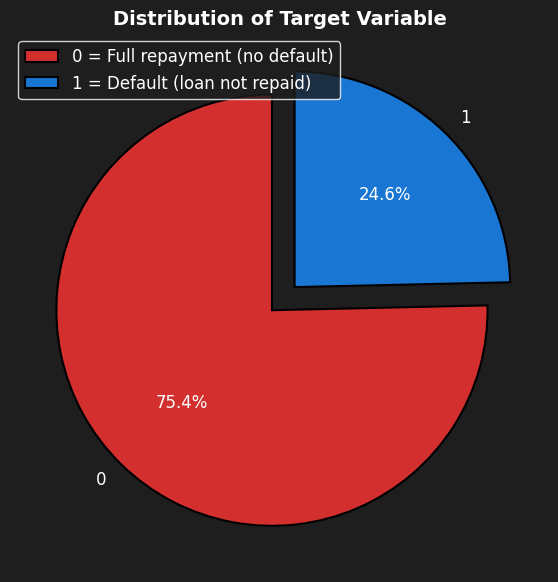

In [5]:
# Plot Status distribution
# Define a palette (Ask GPT for suggestions)
colors = ["#D32F2F", "#1976D2"]  # Darker red and blue
explode = (0.05, 0.1)  # Slightly separate the slices

# Create Pie Chart with 
fig, ax = plt.subplots(figsize=(7, 7), facecolor='#1E1E1E')  # Dark background
ax.set_facecolor('#1E1E1E')

data['Status'].value_counts().plot.pie(
    autopct="%1.1f%%",  # Display percentages with one decimal place
    startangle=90,  # Rotate pie chart to start at 90 degrees (top)
    colors=colors,  # Assign custom colors to slices
    explode=explode,  # Separate slices slightly for better visibility
    textprops={'fontsize': 12, 'color': 'white'},  # White text for contrast
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Add black edge for clarity and separation
    ax=ax  # Use the predefined axis for plotting
)

# Add legend
labels = ["0 = Full repayment (no default)", "1 = Default (loan not repaid)"]
plt.legend(labels, loc="best", fontsize=12, facecolor='#1E1E1E', edgecolor='white', labelcolor='white')

# Styling
plt.ylabel('')  # Remove Y-label
plt.title("Distribution of Target Variable", fontsize=14, color="white", fontweight="bold")  # Title Styling

# Display the plot
plt.show()


Since we don't really have a description of the dataset let's be positive and assume that the majority of bank's customers (75.4%) acctually returned the loan and hence the `0` would mean `Full Repayment` and `1` would mean `Default`. Let's add the legend to the graph to make it more clear. 

# Numeric Data Distribution

In [6]:
data.info()  # Check data types
data.describe()  # Summary stats for numerical features
data.describe(include='object')  # Summary stats for categorical features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,...,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


In [7]:
# number of unique elemenets in ltv
print(data['term'].unique())

[360. 300. 180. 312. 144. 240. 348. 324. 120.  96. 192. 156. 228. 336.
 288. 108. 276.  nan 132. 216. 168. 204. 264. 252. 165. 280. 322.]


array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'rate_of_interest'}>,
        <Axes: title={'center': 'Interest_rate_spread'}>],
       [<Axes: title={'center': 'Upfront_charges'}>,
        <Axes: title={'center': 'term'}>,
        <Axes: title={'center': 'property_value'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'Credit_Score'}>,
        <Axes: title={'center': 'LTV'}>],
       [<Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'dtir1'}>, <Axes: >]], dtype=object)

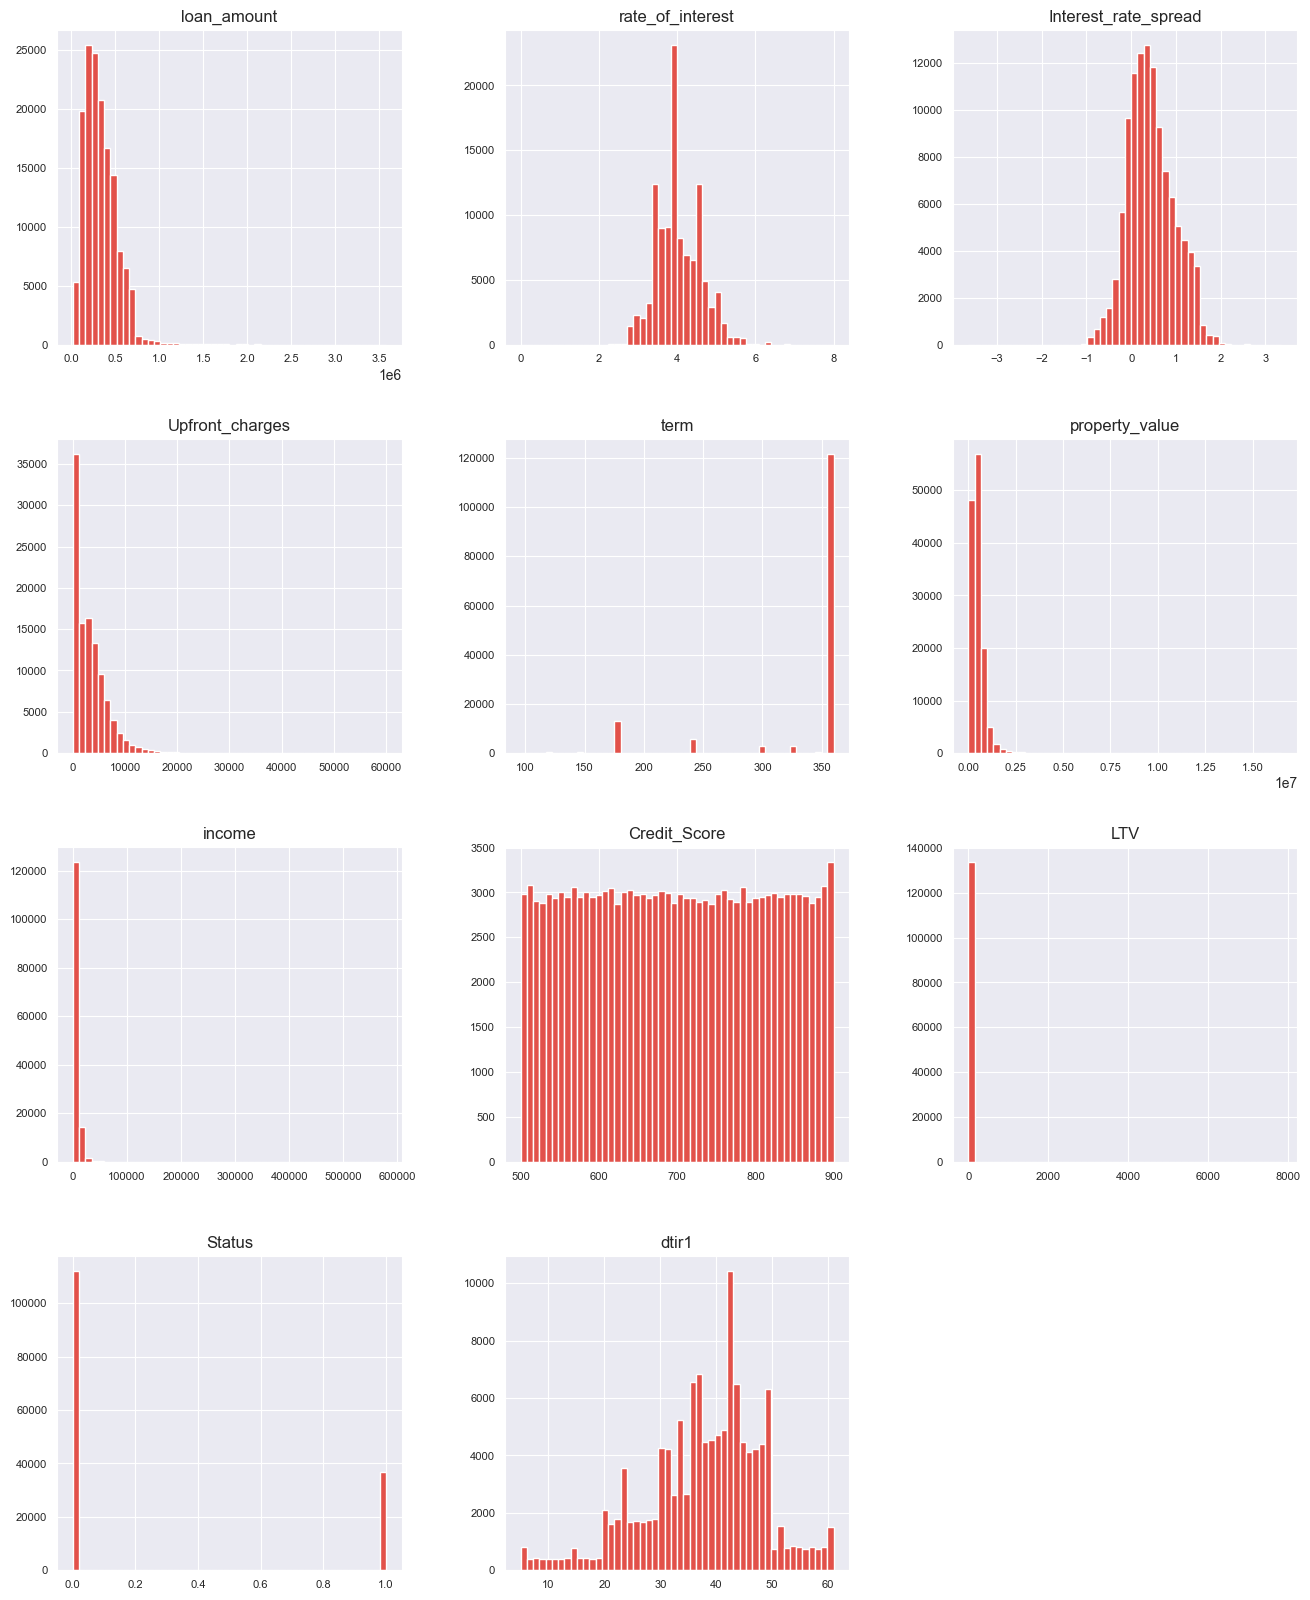

In [8]:
sns.set_style("darkgrid")  # Sleek dark background
sns.set_palette(sns.color_palette("Spectral"))

numeric_data = data.select_dtypes(include = ['float64', 'int64'])
numeric_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Some graphs follow certain distribution types for example: `loan amount`, `upfront charges` and ` property value` i am not sure what does it mean yet but we can dig deeper into the graphs the have certain correlation. 

Furthermore for some graphs histograms are not the best choice, `credit_score` would benefit from a different type of a plot. 

LTV and probably `term` has some super high outlier. we need to remove it. 

We also need to remove all the nan values.


---
I have noticed that some graphs have very tall peaks, some graphs have peaks so tall that other bars are not even present in the graph. This suggests that there are anomalies, lets remove them. 

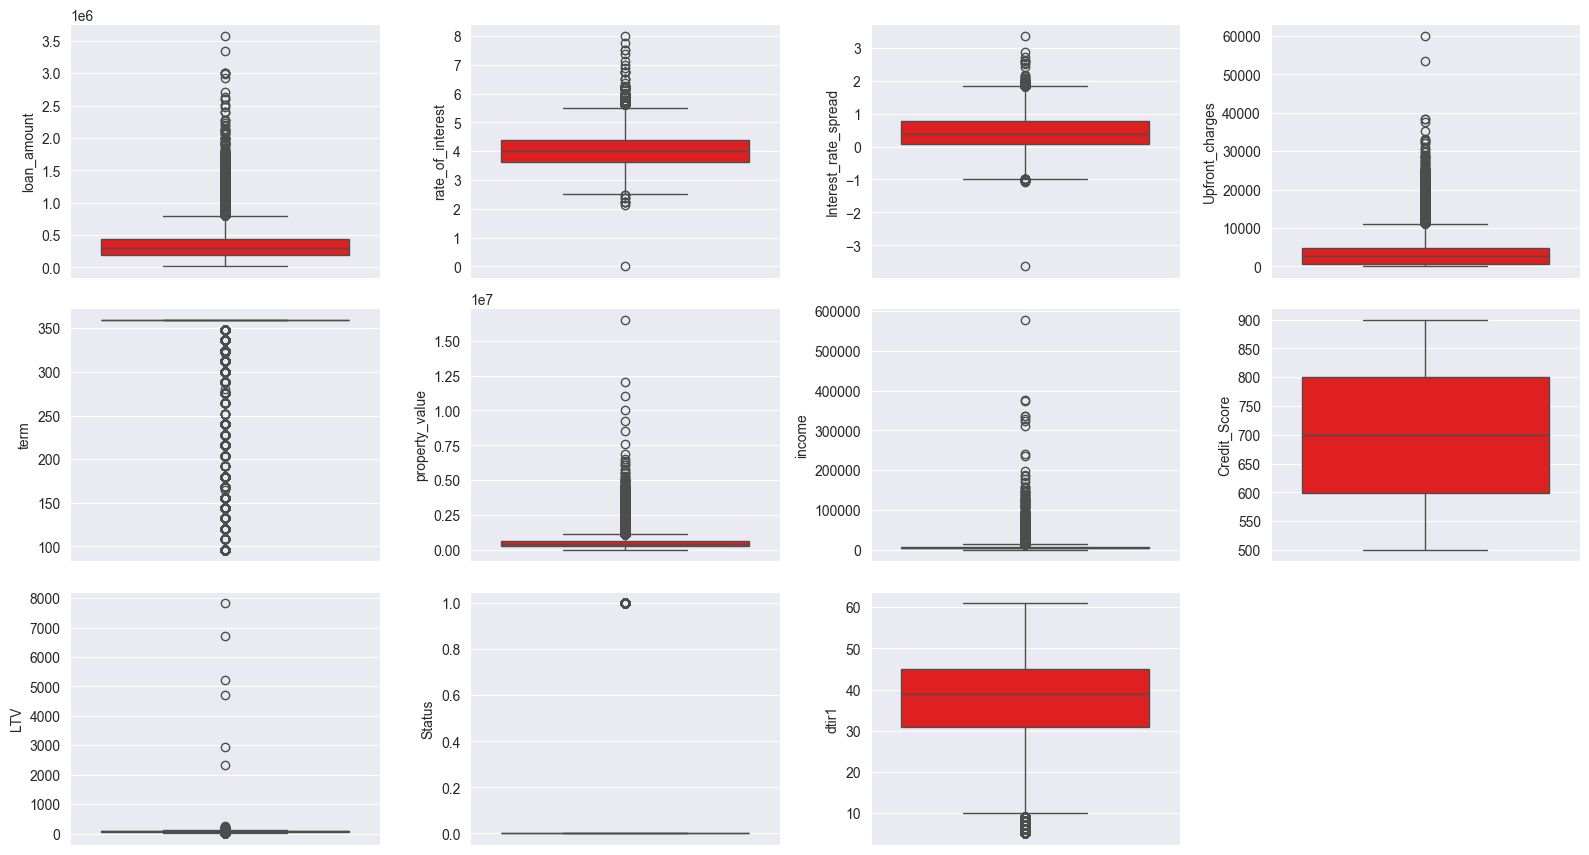

In [36]:
# Lets find outliers in the numerical data
# First lets visualise the data using boxplot
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_data.columns):
    plt.subplot(7, 4, i + 1)
    sns.boxplot(numeric_data[col], color='red', orient='v')
    plt.tight_layout()

/Users/thebekhruz/Desktop/Case_Studies/predictive_modelling/predictive_modelling_venv/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


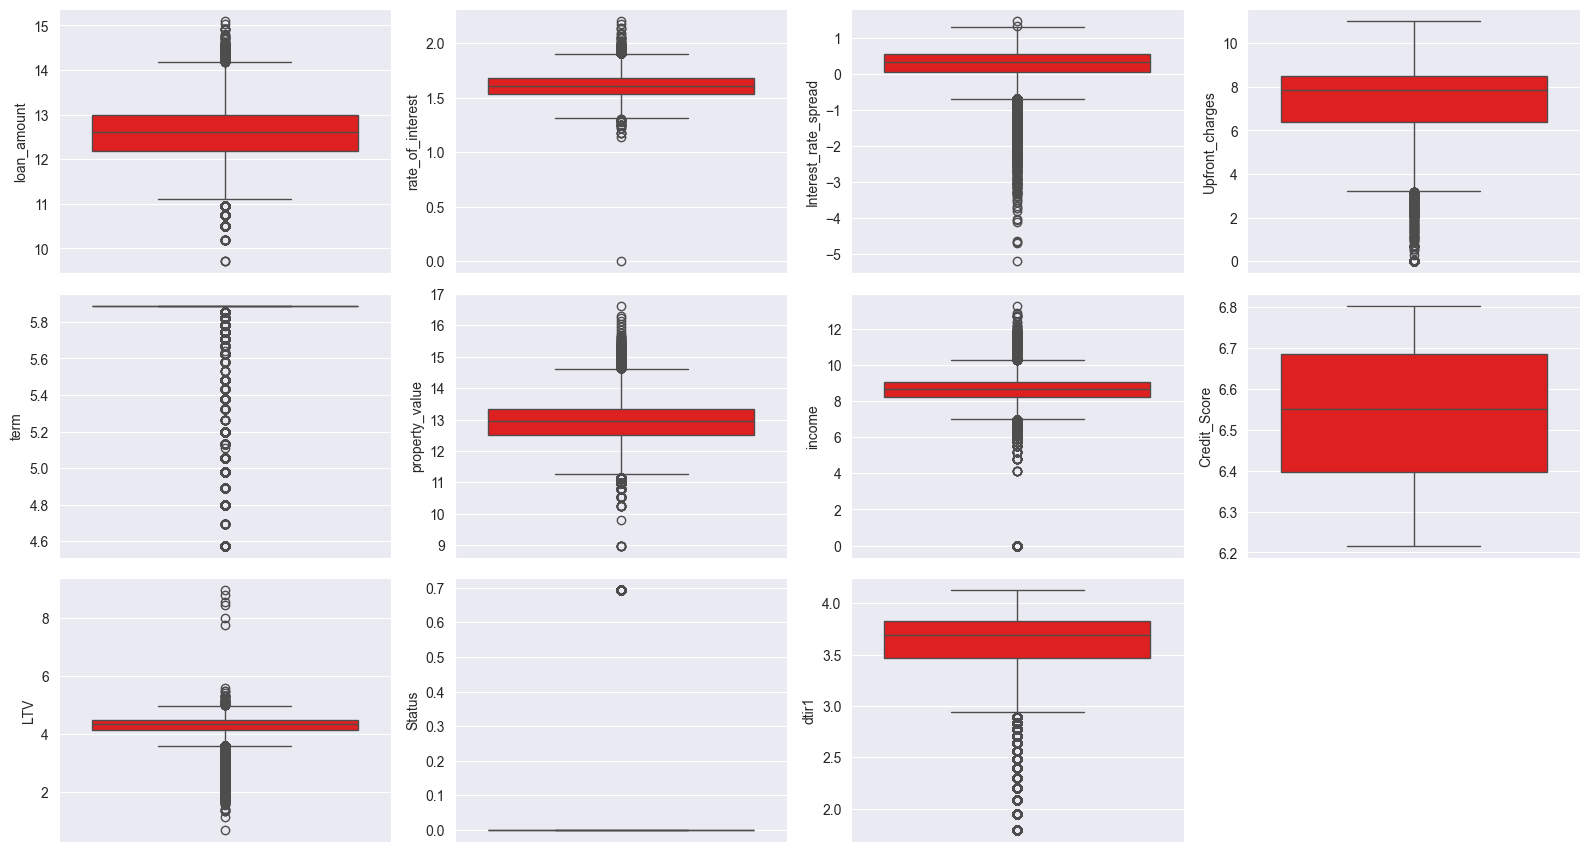

In [ ]:
# This is not a good way to visualise the data as the scales are different
# Lets apply log transformation to the data and then visualise

numeric_data_log = np.log1p(numeric_data)
plt.figure(figsize=(16, 20))

for i, col in enumerate(numeric_data_log.columns):
    plt.subplot(7, 4, i + 1)
    sns.boxplot(numeric_data_log[col], color='red', orient='v')
    plt.tight_layout()
    



Let's use a simple detection tool to search for outliers 

In [16]:

def detect_outliers_log(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for each numeric column in log-transformed data
for column in numeric_data_log.columns:
    outliers_log = detect_outliers_log(numeric_data_log, column)
    print(f"Outliers in {column}:")
    print(outliers_log)
    print("\n")

Outliers in loan_amount:
        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
124860     9.711176               NaN                   NaN              NaN   
135325     9.711176               NaN                   NaN              NaN   
136556     9.711176               NaN                   NaN              NaN   

            term  property_value    income  Credit_Score       LTV    Status  \
124860  5.888878       11.385103  7.230563      6.573680  2.983153  0.693147   
135325  5.888878             NaN  7.855932      6.704414       NaN  0.693147   
136556  5.198497        9.798183  7.944847      6.648985  4.529009  0.693147   

           dtir1  
124860  3.951244  
135325       NaN  
136556  3.637586  


Outliers in rate_of_interest:
       loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
9429     11.575910          2.197225              1.471784         7.963286   
28731    12.632976          2.169054              1.276786         

In [17]:
# What percentage of the data is outliers?

# Calculate percentage of outliers for each numeric column
for column in numeric_data_log.columns:
    outliers_log = detect_outliers_log(numeric_data_log, column)
    percentage_outliers = len(outliers_log) / len(numeric_data_log) * 100
    print(f"Percentage of outliers in {column}: {percentage_outliers:.2f}%")

# What is the toltal percentage of outliers in the data?
# Calculate total percentage of outliers in the data
total_outliers = 0
for column in numeric_data_log.columns:
    outliers_log = detect_outliers_log(numeric_data_log, column)
    total_outliers += len(outliers_log)
total_percentage_outliers = total_outliers / len(numeric_data_log) * 100
print(f"Total percentage of outliers in the data: {total_percentage_outliers:.2f}%")


Percentage of outliers in loan_amount: 0.00%
Percentage of outliers in rate_of_interest: 0.00%
Percentage of outliers in Interest_rate_spread: 0.40%
Percentage of outliers in Upfront_charges: 13.97%
Percentage of outliers in term: 18.12%
Percentage of outliers in property_value: 0.01%
Percentage of outliers in income: 0.93%
Percentage of outliers in Credit_Score: 0.00%
Percentage of outliers in LTV: 1.01%
Percentage of outliers in Status: 24.64%
Percentage of outliers in dtir1: 1.35%
Total percentage of outliers in the data: 60.45%


In [10]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Investigate outliers for each numeric column
for column in numeric_data.columns:
    outliers = detect_outliers(numeric_data, column)
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")

Outliers in loan_amount:
        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
44           866500               NaN                   NaN              NaN   
108          906500             4.375               -0.0131          1702.16   
137         1376500               NaN                   NaN              NaN   
199          826500             4.250               -0.0492           485.55   
227          986500             4.375                0.8453         19700.00   
...             ...               ...                   ...              ...   
148446       876500               NaN                   NaN              NaN   
148449       836500             3.500               -0.1679         11244.45   
148469      1006500             3.125               -0.3094          9000.00   
148526      1106500             3.990                0.3152          2519.00   
148578       986500             3.875                0.2872         19625.00   

         term 

In [ ]:
# Investigate the outliers for each column


<!--  -->

Now we'll try to find which features are strongly correlated with loan `Status`. We will store these features in a variable called `correlated_features`. We will reuse `numeric_data`.

In [14]:
data_corr = numeric_data.corr()['Status']
correlated_features = data_corr[abs(data_corr) > 0].sort_values(ascending=False)
print(f'There are {len(correlated_features)} strongly correlated values with Status:\n{correlated_features}')

There are 10 strongly correlated values with Status:
Status              1.000000
dtir1               0.078083
LTV                 0.038895
rate_of_interest    0.022957
Credit_Score        0.004004
term               -0.000240
Upfront_charges    -0.019138
loan_amount        -0.036825
property_value     -0.048864
income             -0.065119
Name: Status, dtype: float64


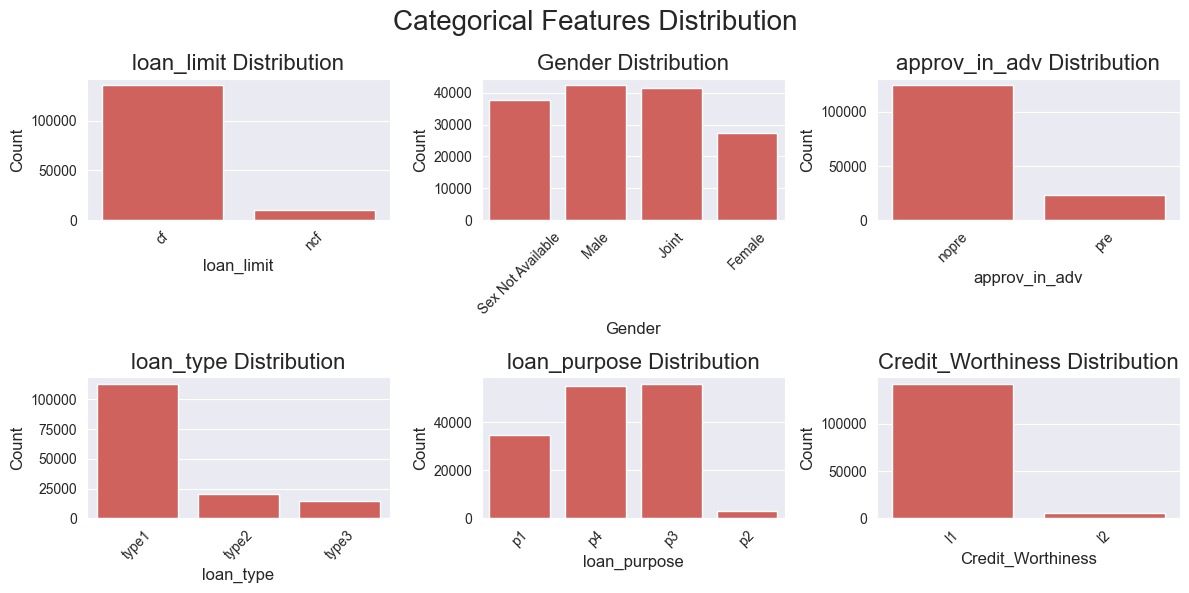

In [13]:
# Explore the categorical features
categorical_data = data.select_dtypes(include='object')
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Categorical Features Distribution', fontsize=20)

for ax, column in zip(axes.flatten(), categorical_data.columns):
    sns.countplot(x=column, data=categorical_data, ax=ax)
    ax.set_title(f'{column} Distribution', fontsize=16)
    ax.set_xlabel(f'{column}', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()



Now since we roughly know where to look for outliers we can move on to Outlier Detection Chapter:

---

# Outlier Detection 


this does not tell me much, just shows how the data is distributed. 


TODO: Now you have to like remove outliers and fill nan values. 

## Data Exploration

In [7]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [9]:
data.sample(10)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
126880,151770,2019,cf,Joint,nopre,type3,p3,l1,nopc,nob/c,...,CIB,580,EXP,35-44,not_inst,84.722222,North,direct,0,61.0
119754,144644,2019,cf,Sex Not Available,pre,type1,p4,l1,nopc,nob/c,...,EQUI,648,EXP,45-54,to_inst,NaN,south,direct,1,NaN
144000,168890,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CRIF,628,EXP,65-74,to_inst,48.161765,North,direct,0,43.0
145260,170150,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,CRIF,685,CIB,45-54,to_inst,69.835329,south,direct,0,38.0
66781,91671,2019,cf,Female,pre,type1,p4,l1,nopc,nob/c,...,CIB,513,CIB,65-74,not_inst,103.870293,south,direct,1,42.0
71331,96221,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,559,CIB,>74,to_inst,77.173913,south,direct,0,21.0
82026,106916,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,590,CIB,45-54,to_inst,77.853261,North,direct,0,48.0
74612,99502,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CRIF,863,EXP,55-64,to_inst,57.965686,North,direct,0,5.0
27640,52530,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EQUI,526,EXP,45-54,to_inst,NaN,south,direct,1,NaN
132305,157195,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,CRIF,831,CIB,45-54,to_inst,61.075949,south,direct,1,22.0


In [10]:
print(data.shape)
print(data.columns)

(148670, 34)
Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


In [11]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

# EDA

## Data Cleaning: Dropping and Handling Missing Values

### What We Are Doing
1. **Dropping Unnecessary Columns**  
   - Removing columns that are not needed for analysis:  
     `'loan_limit'`, `'rate_of_interest'`, `'Interest_rate_spread'`, `'Upfront_charges'`, `'property_value'`, `'dtir1'`, and `'LTV'`.  
   - This reduces dimensionality and improves efficiency.

2. **Handling Missing Values**  
   - Iterating through all columns in the dataset:
     - If a column has missing values:
       - If it's numerical (`float64` or `int64`), we fill missing values with the **median** to avoid skewing the data.
       - If it's categorical, we fill missing values with the **most frequent value** (mode).
   - This ensures that no missing values remain, preventing errors in analysis or modeling.

3. **Validation**  
   - Printing the count of missing values after imputation to confirm that all missing data has been handled.


In [11]:
# Dropping unnecessary columns
unnecessary_columns = ['loan_limit', 'rate_of_interest', 'Interest_rate_spread', 
                        'Upfront_charges', 'property_value', 'dtir1', 'LTV']
data.drop(unnecessary_columns, axis=1, inplace=True)
data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,24890,2019,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,360.0,not_neg,not_int,not_lpsm,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,south,direct,1
1,24891,2019,Male,nopre,type2,p1,l1,nopc,b/c,206500,360.0,not_neg,not_int,lpsm,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,North,direct,1
2,24892,2019,Male,pre,type1,p1,l1,nopc,nob/c,406500,360.0,neg_amm,not_int,not_lpsm,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,south,direct,0
3,24893,2019,Male,nopre,type1,p4,l1,nopc,nob/c,456500,360.0,not_neg,not_int,not_lpsm,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,North,direct,0
4,24894,2019,Joint,pre,type1,p1,l1,nopc,nob/c,696500,360.0,not_neg,not_int,not_lpsm,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,North,direct,0


In [16]:
# Handling missing values (including infinite values)
for column in data.columns:
    data[column] = data[column].replace([np.inf, -np.inf], np.nan)  # Handle inf values
    if data[column].isnull().sum() > 0:
        if data[column].dtype in ['float64', 'int64']:  
            data[column] = data[column].fillna(data[column].median())  # Fill NaN with median
        else:  
            data[column] = data[column].fillna(data[column].mode()[0])  # Fill NaN with mode

print(data.isnull().sum())

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

## Encoding Categorical Variables

### Why?
Machine learning models require numerical inputs. Categorical (dtype = object) variables must be converted to numbers to be processed effectively.

### How?

1. **Label Encoding**  
   - Converts categorical columns (`label_columns`) into numerical values.  
   - Each unique category is assigned an integer.  
   - Suitable for ordinal data but can introduce unintended ordinal relationships for nominal categories.  

2. **One-Hot Encoding (`get_dummies`)**  
   - Applied to `'Region'` to create binary columns for each category.  
   - `drop_first=True` removes one category to prevent multicollinearity.  
   - Ensures categorical data is represented without imposing a false order.  


In [18]:
# Necessery imports for this chapter:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# Print the unique values of the categorical columns
for column in data.columns:
    if data[column].dtype == 'object':
        print(f'{column}: {data[column].unique()}')

Gender: ['Sex Not Available' 'Male' 'Joint' 'Female']
approv_in_adv: ['nopre' 'pre']
loan_type: ['type1' 'type2' 'type3']
loan_purpose: ['p1' 'p4' 'p3' 'p2']
Credit_Worthiness: ['l1' 'l2']
open_credit: ['nopc' 'opc']
business_or_commercial: ['nob/c' 'b/c']
Neg_ammortization: ['not_neg' 'neg_amm']
interest_only: ['not_int' 'int_only']
lump_sum_payment: ['not_lpsm' 'lpsm']
construction_type: ['sb' 'mh']
occupancy_type: ['pr' 'sr' 'ir']
Secured_by: ['home' 'land']
total_units: ['1U' '2U' '3U' '4U']
credit_type: ['EXP' 'EQUI' 'CRIF' 'CIB']
co-applicant_credit_type: ['CIB' 'EXP']
age: ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
submission_of_application: ['to_inst' 'not_inst']
Region: ['south' 'North' 'central' 'North-East']
Security_Type: ['direct' 'Indriect']


In [15]:
# Label Encoding for Binary & Ordinal Categories
label_cols = [
    'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 
    'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 
    'construction_type', 'occupancy_type', 'Secured_by', 'submission_of_application', 'Security_Type'
]
categorical_columns = data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# One-Hot Encoding for Nominal Categories
one_hot_cols = ['total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'Region']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

In [16]:
data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,income,Credit_Score,submission_of_application,Security_Type,Status,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
0,24890,2019,3,0,0,0,0,0,1,116500,360.0,1,1,1,1,1,0,1740.0,758,1,1,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,24891,2019,2,0,1,0,0,0,0,206500,360.0,1,1,0,1,1,0,4980.0,552,1,1,1,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
2,24892,2019,2,1,0,0,0,0,1,406500,360.0,0,1,1,1,1,0,9480.0,834,1,1,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True
3,24893,2019,2,0,0,3,0,0,1,456500,360.0,1,1,1,1,1,0,11880.0,587,0,1,0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
4,24894,2019,1,1,0,0,0,0,1,696500,360.0,1,1,1,1,1,0,10440.0,602,0,1,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False


---


In [17]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

## 1️⃣ Loan Amount Distribution (Histogram with KDE)

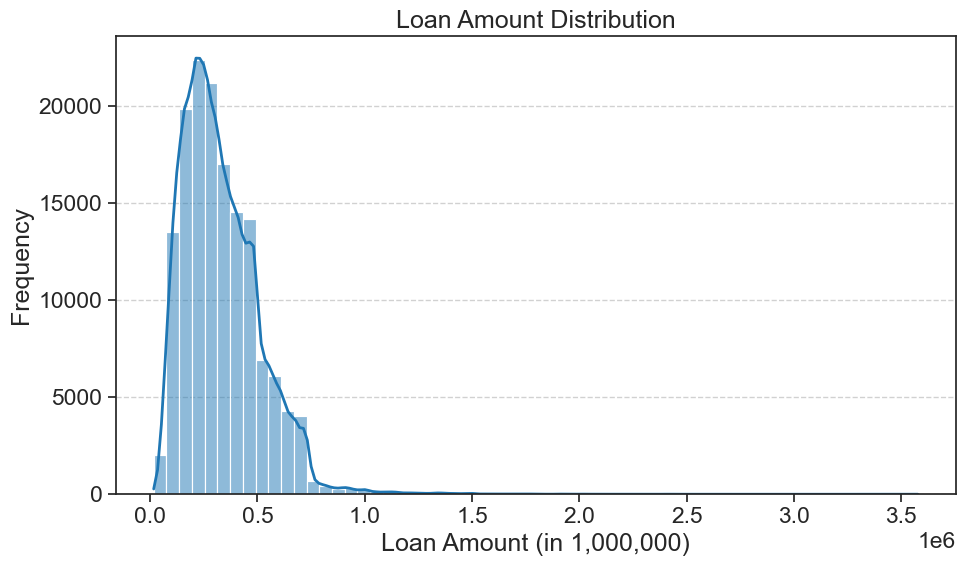

In [18]:
"""
# Loan Amount Distribution
# --------------------------------------------------------------
# Description: Plots the density distribution of loan amounts in the dataset.
# Insights:
#  - Loan amounts are heavily skewed towards smaller values (< $500,000).
#  - High loan amounts are rare in the dataset.
# Evidence:
#  - Peak density occurs at lower loan amounts, with frequency dropping sharply beyond $500,000.
# Action:
#  - Use log transformation or binning to normalize the distribution for modeling.
"""
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme and styling configurations
sns.set_style("ticks")
sns.set_context('notebook', font_scale=1.5, rc={"lines.linewidth": 2})

# Create figure
plt.figure(figsize=(10, 6))
sns.despine()
sns.histplot(data['loan_amount'], kde=True, bins=60)

# Customizations
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount (in 1,000,000)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.9)  

# Show plot
plt.tight_layout()
plt.show()


## 2️⃣ Loan Default Distribution (Bar Plot)


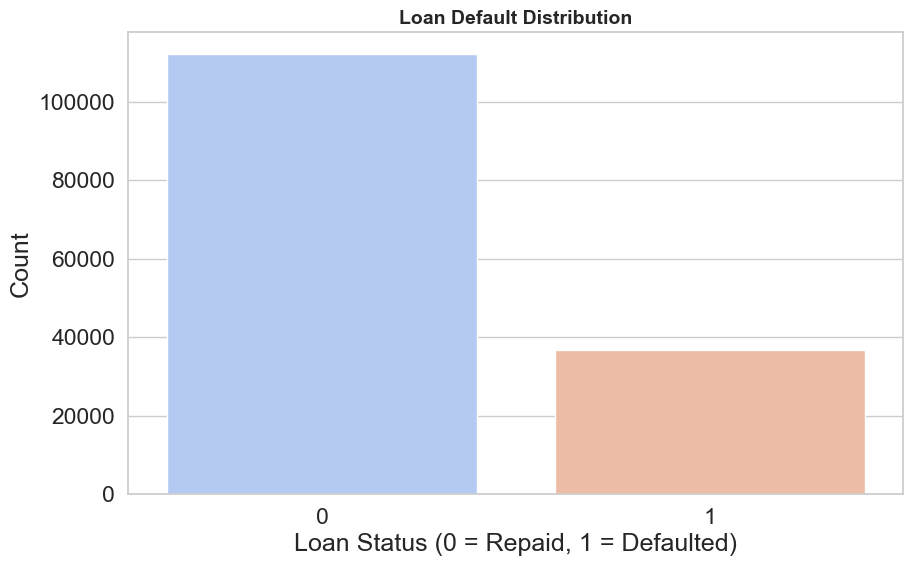

In [19]:
"""
# Loan Default Distribution
# --------------------------------------------------------------
# Description: Visualizes the distribution of loan status (repaid vs. defaulted).
# Insights:
#  - Majority of loans (Status = 0) are repaid.
#  - Defaulted loans (Status = 1) represent a smaller proportion.
# Evidence:
#  - The count of repaid loans (blue bar) is significantly higher than the defaulted loans (orange bar).

"""
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Status", hue="Status", data=data, palette="coolwarm", legend=False)
plt.title("Loan Default Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Loan Status (0 = Repaid, 1 = Defaulted)")
plt.ylabel("Count")
plt.show()

## 3️⃣ Credit Score Distribution for Loan Default vs. Repaid (KDE Plot)

In [20]:
credit_score_range = data['Credit_Score'].max() - data['Credit_Score'].min()
print(f"Credit Score Range: {credit_score_range}")

Credit Score Range: 400


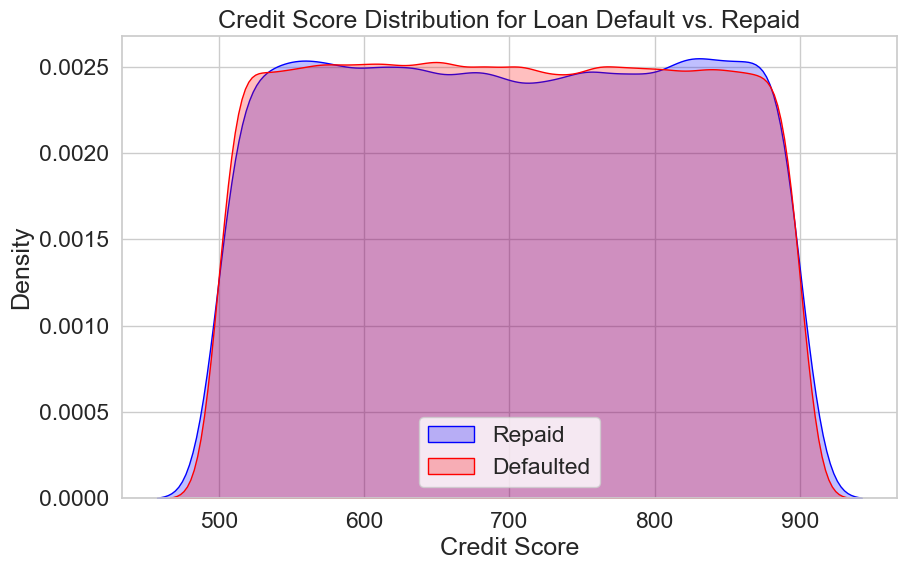

In [21]:
"""
# Credit Score Distribution (Default vs. Repaid)
# --------------------------------------------------------------
# Description: Compares the credit score distributions of defaulters (Status = 1) and non-defaulters (Status = 0).
# Insights:
#  - Minimal difference in the credit score distributions of the two groups.
# Evidence:
#  - Overlapping KDE curves (blue for repaid, red for defaulted).
# Action:
#  - Combine credit score with other variables (e.g., income, loan amount) for better predictive power.
"""
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data["Status"]==1]["Credit_Score"], label="Repaid", fill=True, color="blue")
sns.kdeplot(data[data["Status"]==0]["Credit_Score"], label="Defaulted", fill=True, color="red")
plt.title("Credit Score Distribution for Loan Default vs. Repaid")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.legend()
plt.show()


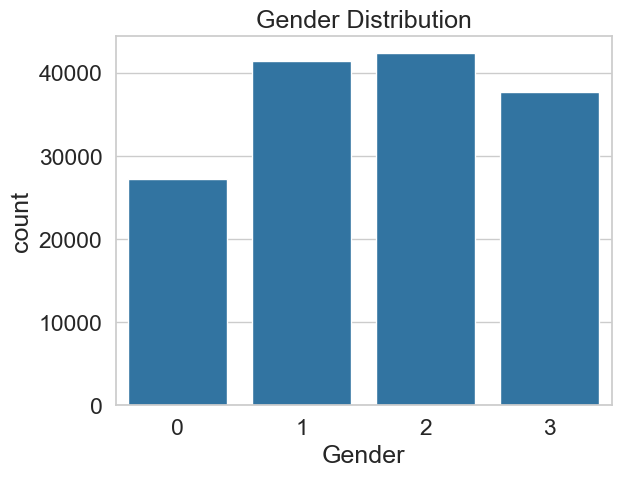

In [22]:
# Gender distribution
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

## 4️⃣ Loan Amount Distribution by Loan Default Status (Boxplot)

/var/folders/xh/x6c57wpx5hv7g4hxw7y4c6cc0000gn/T/ipykernel_3575/285807816.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Status", y="loan_amount", data=data, palette="coolwarm")


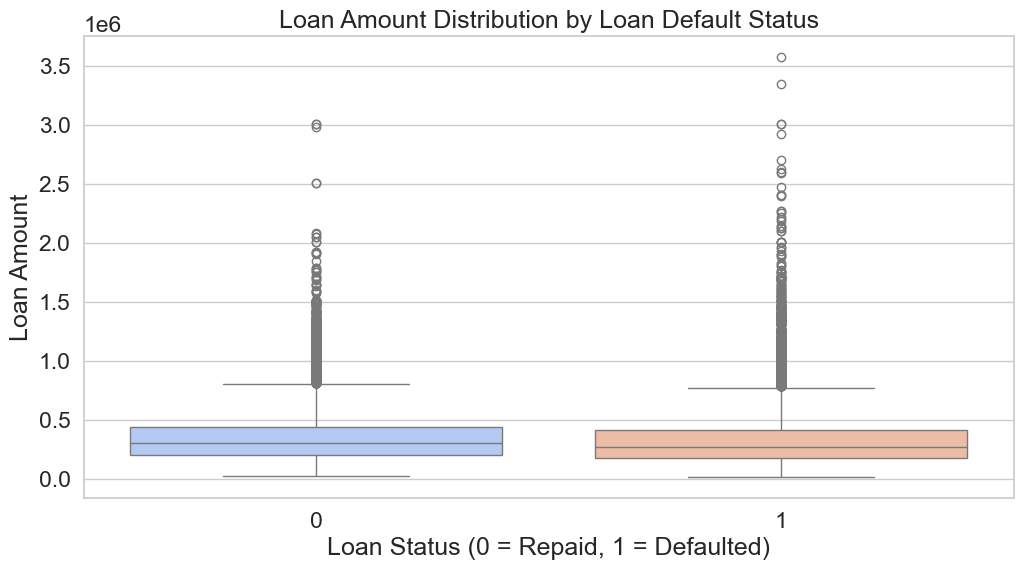

In [23]:
"""
# Loan Amount by Loan Status (Boxplot)
# --------------------------------------------------------------
# Description: Shows how loan amounts vary across default statuses.
# Insights:
#  - Median loan amount is slightly higher for defaulted loans (Status = 1).
#  - Significant overlap in loan amount ranges between defaulted and repaid loans.
# Evidence:
#  - Boxplot whiskers and outliers show wide variance in both categories.
# Action:
#  - Derive new features (e.g., loan-to-income ratio) to enhance differentiation between groups.
"""

plt.figure(figsize=(12,6))
sns.boxplot(x="Status", y="loan_amount", data=data, palette="coolwarm")
plt.title("Loan Amount Distribution by Loan Default Status")
plt.xlabel("Loan Status (0 = Repaid, 1 = Defaulted)")
plt.ylabel("Loan Amount")
plt.show()


## 5️⃣ Income vs Loan Amount with Default Status (Scatter Plot)

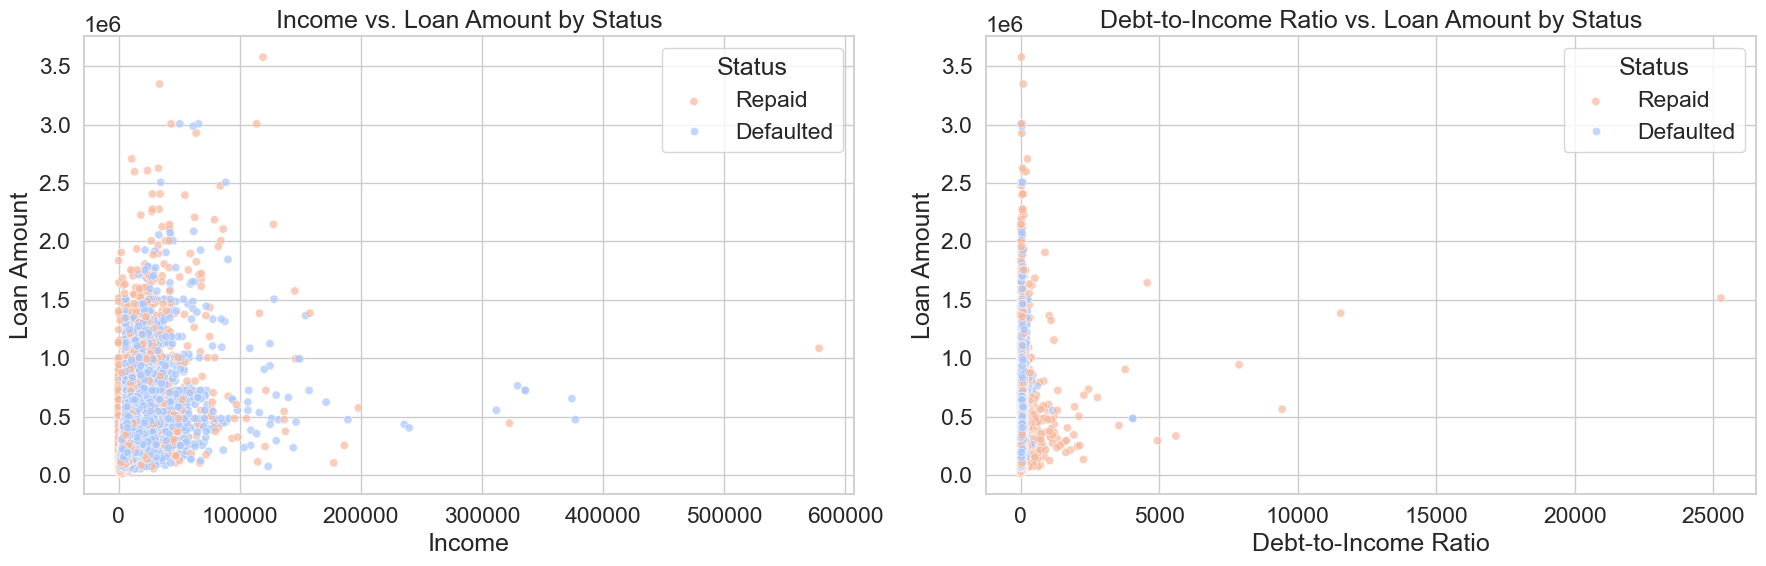

In [24]:
"""
# Income vs. Loan Amount by Default Status
# --------------------------------------------------------------
# Description: Plots borrower income against loan amount, colored by default status.
# Insights:
#  - No clear separation between defaulted (Status = 1) and repaid loans (Status = 0).
# Evidence:
#  - Points for both categories overlap across the entire range of income and loan amounts.
# Action:
#  - Create derived metrics like debt-to-income (DTI) ratio for better predictive insights.
"""

data["DTI"] = data["loan_amount"] / data["income"]

# Separate by repayment status
dti_repaid = data[data["Status"] == 1]["DTI"]
dti_defaulted = data[data["Status"] == 0]["DTI"]

# Create figure
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Income vs. Loan Amount
sns.scatterplot(x="income", y="loan_amount", hue="Status", data=data, alpha=0.7, palette="coolwarm", ax=ax[0])
ax[0].set_title("Income vs. Loan Amount by Status")
ax[0].set_xlabel("Income")
ax[0].set_ylabel("Loan Amount")
ax[0].legend(title="Status", labels=["Repaid", "Defaulted"])

# Debt-to-Income Ratio vs. Loan Amount
sns.scatterplot(x="DTI", y="loan_amount", hue="Status", data=data, alpha=0.7, palette="coolwarm", ax=ax[1])
ax[1].set_title("Debt-to-Income Ratio vs. Loan Amount by Status")
ax[1].set_xlabel("Debt-to-Income Ratio")
ax[1].set_ylabel("Loan Amount")
ax[1].legend(title="Status", labels=["Repaid", "Defaulted"])

# Show plot
plt.tight_layout()
plt.show()


# plt.figure(figsize=(10,6))
# sns.scatterplot(x="income", y="loan_amount", hue="Status", data=data, alpha=0.7, palette="coolwarm")
# plt.title("Income vs Loan Amount with Default Status")
# plt.xlabel("Income")
# plt.ylabel("Loan Amount")
# plt.legend(title="Status", labels=["Repaid", "Defaulted"])
# plt.show()


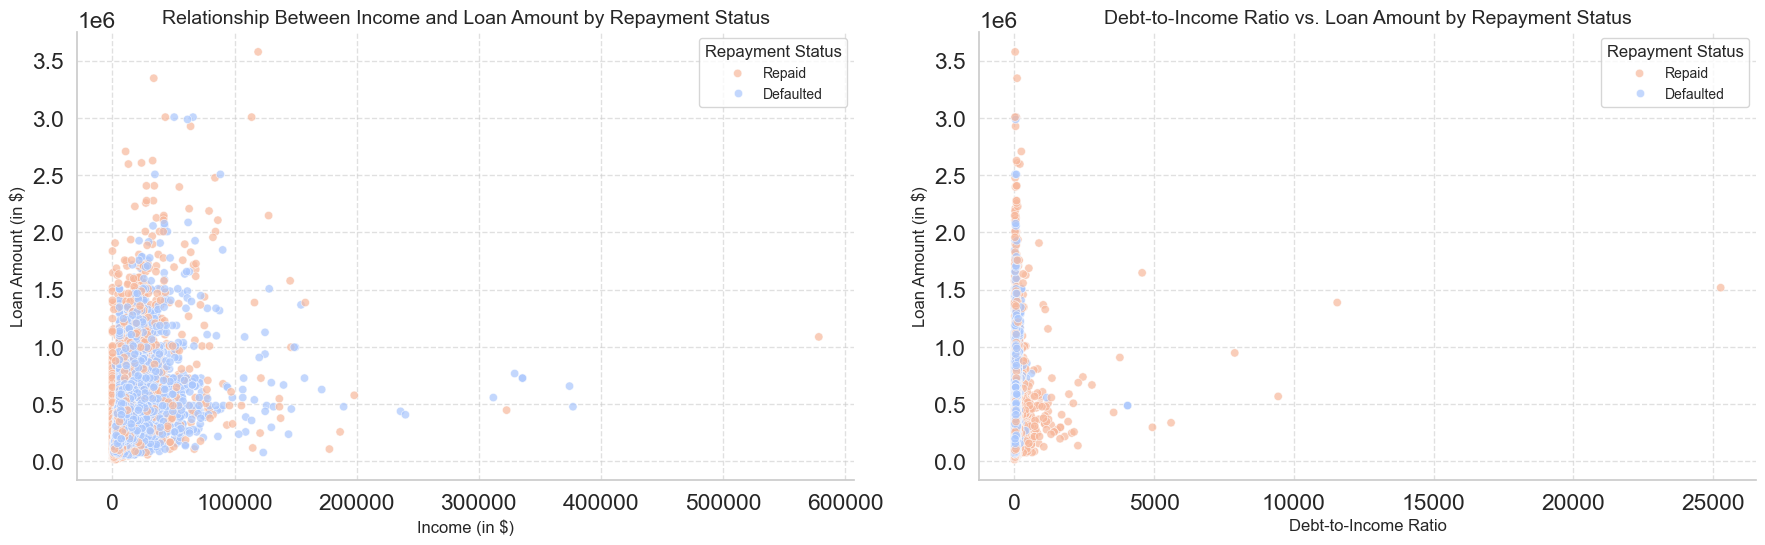

In [25]:
"""
# Income vs. Loan Amount and Debt-to-Income Ratio Analysis
# --------------------------------------------------------------
# Description:
# These scatter plots explore the relationships between `Income`, `Loan Amount`, and `Debt-to-Income Ratio (DTI)` with loan repayment status (`Repaid` vs. `Defaulted`).

# Insights:
# 1. Income vs. Loan Amount:
#    - Borrowers with lower incomes and smaller loan amounts dominate the dataset.
#    - Defaulted loans show no clear pattern of separation from repaid loans in this feature pair.
#    - Outliers with high incomes and loan amounts are present but equally distributed across repayment statuses.

# 2. Debt-to-Income Ratio vs. Loan Amount:
#    - Most loans have low DTI values (below 500), irrespective of repayment status.
#    - High DTI values (above 10,000) are more commonly associated with defaults, though these cases are sparse.
#    - No clear linear relationship is observed between DTI and loan amount.

# Evidence:
# - Scatter plots show overlapping clusters of defaulted and repaid loans in both feature spaces.
# - Defaulted loans appear more frequently at extreme DTI values, as indicated by data points in the high-DTI region.
"""

# Separate by repayment status
data["DTI"] = data["loan_amount"] / data["income"]

# Create figure
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Income vs. Loan Amount
sns.scatterplot(
    x="income", y="loan_amount", hue="Status", data=data, alpha=0.7, palette="coolwarm", ax=ax[0])
ax[0].set_title("Relationship Between Income and Loan Amount by Repayment Status", fontsize=14)
ax[0].set_xlabel("Income (in $)", fontsize=12)
ax[0].set_ylabel("Loan Amount (in $)", fontsize=12)
ax[0].legend(
    title="Repayment Status", labels=["Repaid", "Defaulted"], loc="upper right", fontsize=10, title_fontsize=12
)

# Debt-to-Income Ratio vs. Loan Amount
sns.scatterplot(
    x="DTI", y="loan_amount", hue="Status", data=data, alpha=0.7, palette="coolwarm", ax=ax[1])
ax[1].set_title("Debt-to-Income Ratio vs. Loan Amount by Repayment Status", fontsize=14)
ax[1].set_xlabel("Debt-to-Income Ratio", fontsize=12)
ax[1].set_ylabel("Loan Amount (in $)", fontsize=12)
ax[1].legend(
    title="Repayment Status", labels=["Repaid", "Defaulted"], loc="upper right", fontsize=10, title_fontsize=12
)

# Add grid and style tweaks
for axis in ax:
    axis.grid(True, linestyle="--", alpha=0.6)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


## 6️⃣ Feature Correlation Heatmap

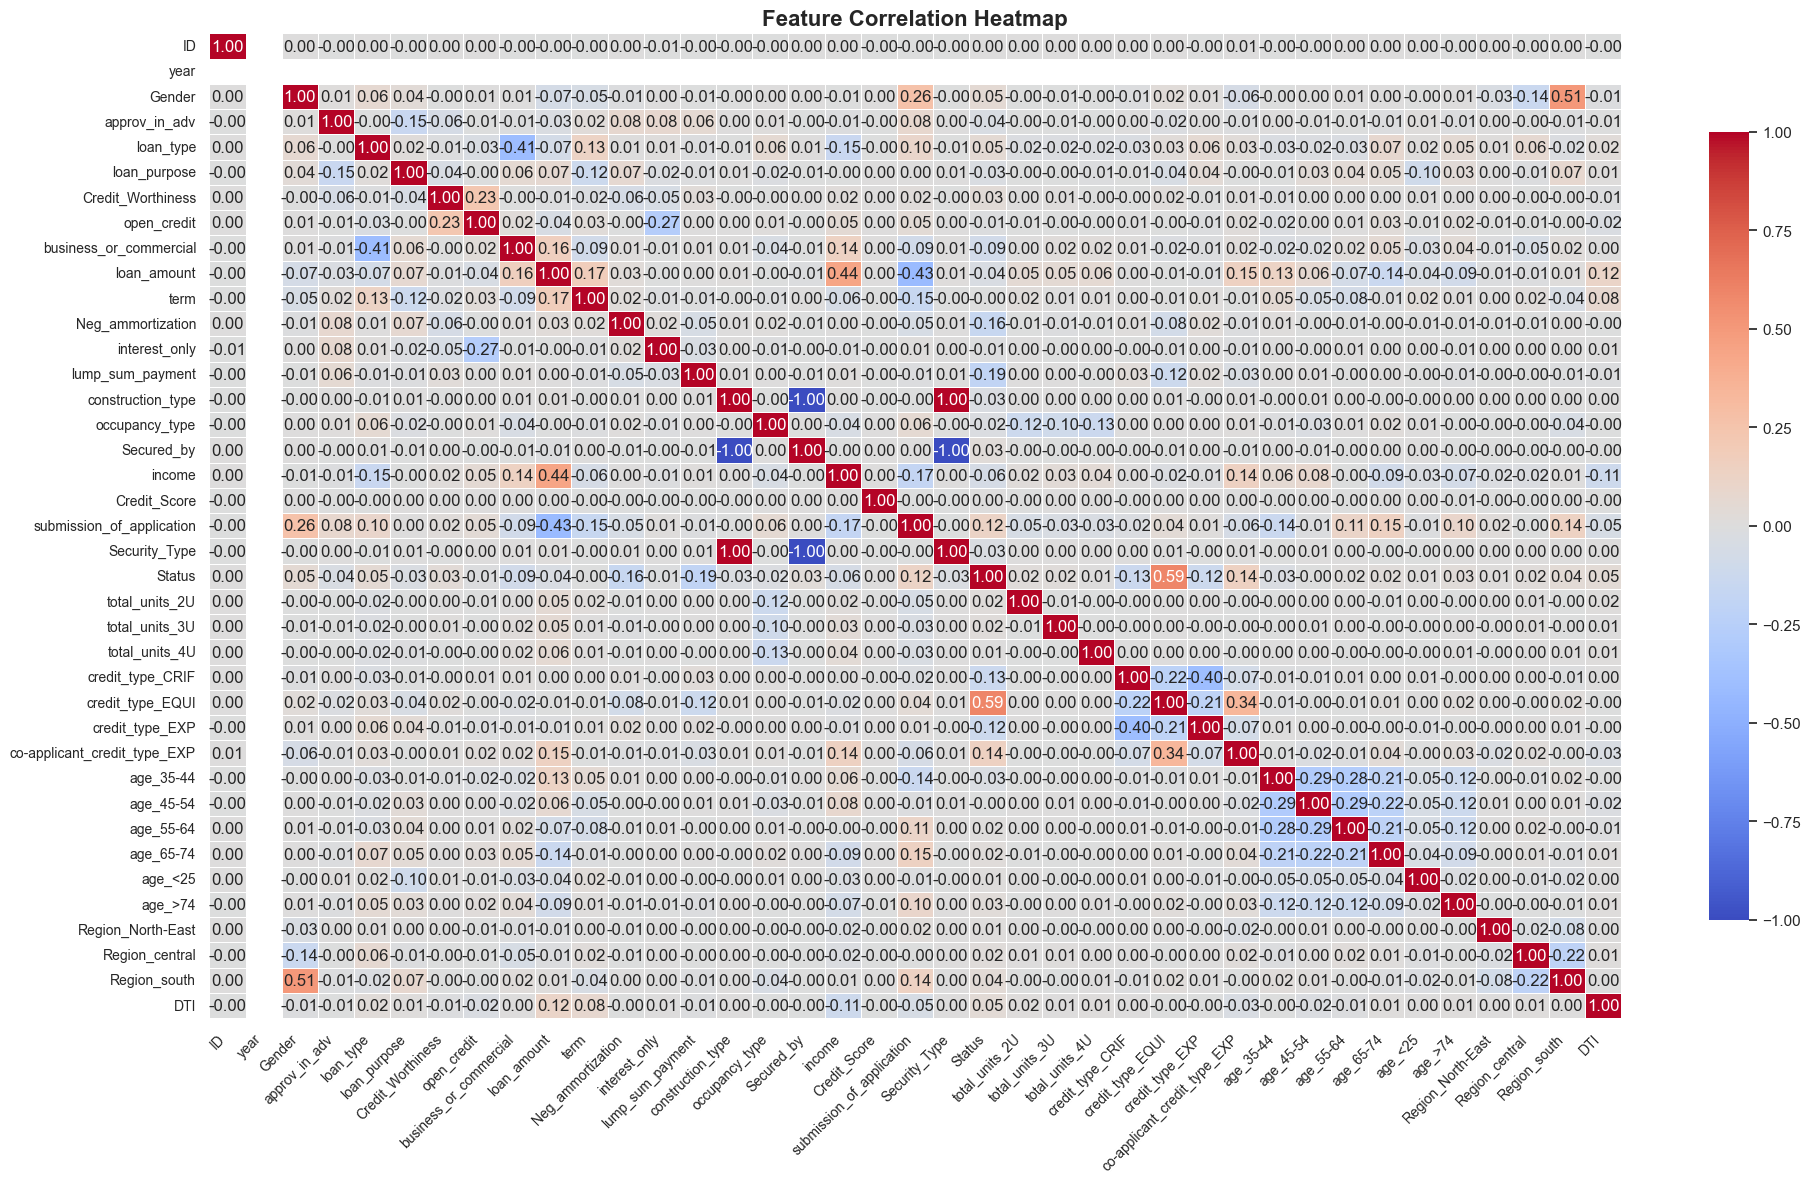

In [26]:
"""
# Feature Correlation Heatmap
# --------------------------------------------------------------
# Description: Visualizes correlations between numerical variables.
# Insights:
#  - Moderate correlation between `income` and `loan_amount` (~0.44).
#  - Weak correlation between `Credit_Score` and `Status` (~0.06).
# Evidence:
#  - Color intensity and numeric values in the heatmap.
# Action:
#  - Focus on multi-variable interactions for predictive modeling.
#  - Remove highly correlated redundant features to avoid multicollinearity.
"""


# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the figure and axis
plt.figure(figsize=(20, 12))
sns.set_theme(style="white")

# Generate the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation coefficients
    fmt=".2f",  # Format for numbers
    cmap="coolwarm",  # Diverging color palette for better contrast
    linewidths=0.5,  # Add lines between cells
    cbar_kws={"shrink": 0.8},  # Shrink the colorbar for better fit
)

# Add title and labels
plt.title("Feature Correlation Heatmap", fontsize=16, weight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


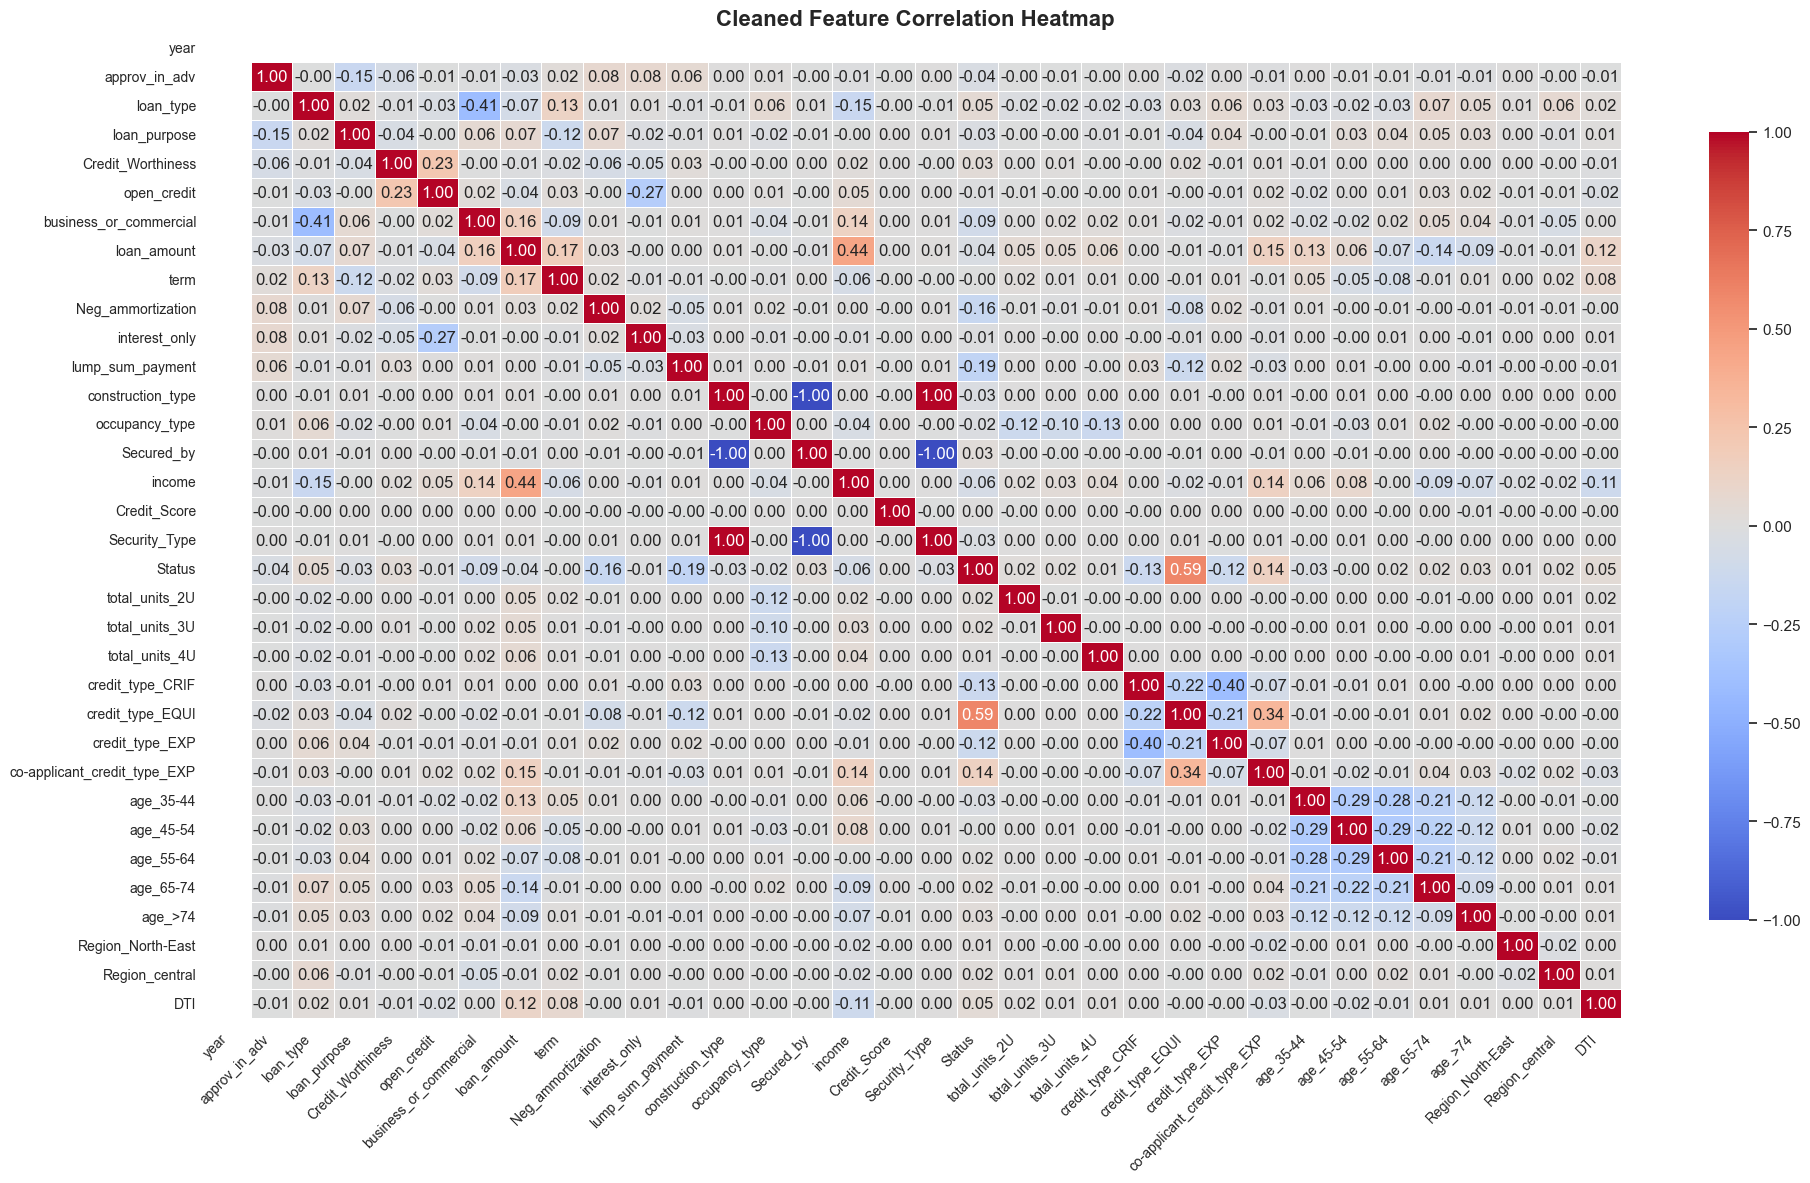

In [27]:
columns_to_drop = [
    "ID",  # Identifier, irrelevant
    "submission_of_application",  # Low relevance
    "Gender",  # Not numerical
    "Region_south",  # Redundant region data
    "age_<25"  # Other age categories suffice
]

# Drop unnecessary columns
heatmap_data = data.drop(columns=columns_to_drop)

# Calculate correlation
correlation_matrix = heatmap_data.corr()

# Plot Heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Cleaned Feature Correlation Heatmap", fontsize=16, weight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

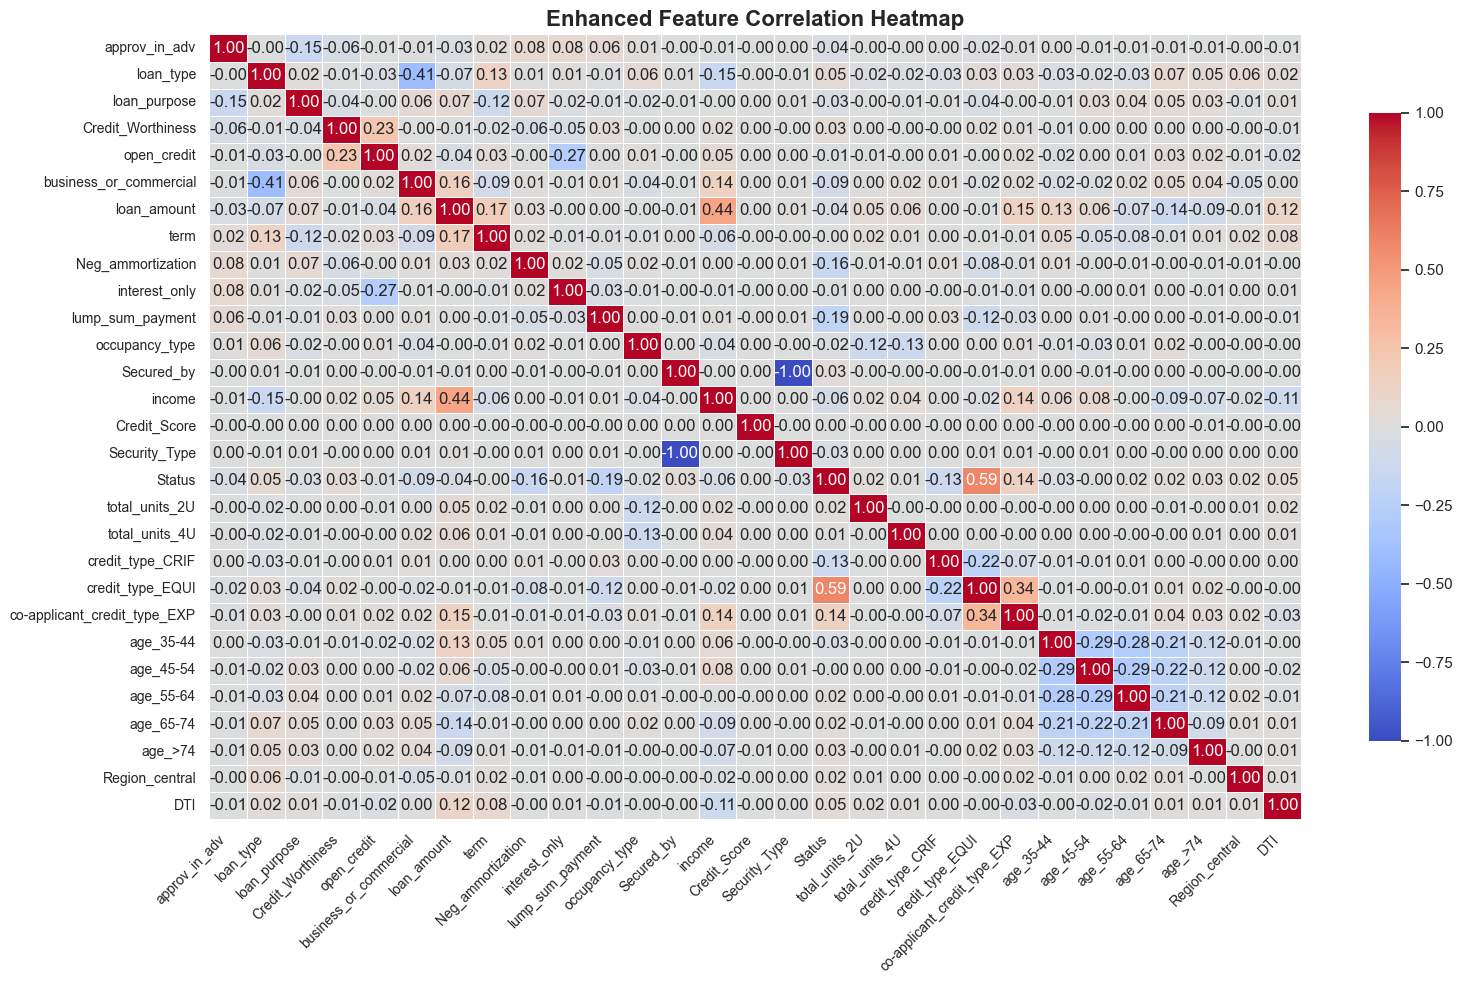

In [28]:
columns_to_drop = [
    "ID",  # Identifier, irrelevant
    "submission_of_application",  # Low relevance
    "Gender",  # Not numerical
    "Region_south",  # Redundant region data
    "age_<25",  # Other age categories suffice
    "total_units_3U",  # Correlated with total_units_2U and 4U
    "credit_type_EXP",  # Correlated with co-applicant_credit_type_EXP
    "construction_type",  # Low correlation with target
    "Region_North-East",  # Region redundancy
    "year"  # Temporal information might not be relevant here
]

# Drop selected columns
heatmap_data = data.drop(columns=columns_to_drop)

# Calculate correlation
correlation_matrix = heatmap_data.corr()

# Plot Heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Enhanced Feature Correlation Heatmap", fontsize=16, weight="bold")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 7️⃣ Feature Importances (Random Forest)

In [29]:
"""
# Random Forest Feature Importance
# --------------------------------------------------------------
# Description: Displays the top 10 features contributing to loan default prediction.
# Insights:
#  - `credit_type_EQUI` is the most influential feature.
#  - `income`, `Credit_Score`, and `loan_amount` are also key predictors.
# Evidence:
#  - Feature importance scores from Random Forest model.
# Action:
#  - Investigate `ID` for potential data leakage.
#  - Retrain the model with the most important features to improve performance.
#  - Use SHAP values for interpretability and to validate feature impact.
"""

# # Assuming 'Status' is the target variable
# X = data.drop(columns=["Status"])  # Features
# y = data["Status"]  # Target

# # Handle categorical variables if needed
# X = pd.get_dummies(X, drop_first=True)

# # Train a simple Random Forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y)

# # Feature importance plot
# feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10], palette="coolwarm")
# plt.title("Top 10 Feature Importances (Random Forest)")
# plt.xlabel("Feature Importance Score")
# plt.ylabel("Features")
# plt.show()


'\n# Random Forest Feature Importance\n# --------------------------------------------------------------\n# Description: Displays the top 10 features contributing to loan default prediction.\n# Insights:\n#  - `credit_type_EQUI` is the most influential feature.\n#  - `income`, `Credit_Score`, and `loan_amount` are also key predictors.\n# Evidence:\n#  - Feature importance scores from Random Forest model.\n# Action:\n#  - Investigate `ID` for potential data leakage.\n#  - Retrain the model with the most important features to improve performance.\n#  - Use SHAP values for interpretability and to validate feature impact.\n'

In [30]:
# """
# # Random Forest Feature Importance Analysis Documentation
# # --------------------------------------------------------------
# # Description:
# # This script identifies the most important features contributing to loan default prediction using a Random Forest classifier. Irrelevant and redundant columns were removed to enhance model performance and interpretability.

# # Steps:
# 1. **Data Cleaning**:
#    - Dropped columns with minimal or no predictive value, such as `ID` and low-variance features (`construction_type`).
#    - Removed highly correlated features to reduce redundancy (e.g., `credit_type_EXP`).

# 2. **Preprocessing**:
#    - Replaced infinite values with NaN to ensure data consistency.
#    - Filled NaN values with the median of each column to handle missing data.

# 3. **Random Forest Training**:
#    - A Random Forest classifier was trained to determine feature importance.
#    - Feature importance scores were calculated and visualized.

# # Findings:
# ## Top Features:
# 1. **credit_type_EQUI**:
#    - Point: The most influential feature for predicting loan defaults.
#    - Evidence: Highest feature importance score (>0.25).
#    - Explanation: Likely captures credit behavior or reliability of borrowers.

# 2. **DTI (Debt-to-Income Ratio)**:
#    - Point: Strong predictor of defaults.
#    - Evidence: Second highest feature importance score.
#    - Explanation: Indicates borrowers' financial stress.

# 3. **Credit_Score**:
#    - Point: Strong negative correlation with defaults.
#    - Evidence: Consistently ranked as a key predictor.
#    - Explanation: Lower credit scores suggest higher risk.

# 4. **income**:
#    - Point: Indicates the borrower’s repayment capacity.
#    - Evidence: High importance score.
#    - Explanation: Higher incomes are generally associated with better repayment ability.

# 5. **loan_amount**:
#    - Point: Reflects the size of the borrower’s financial obligation.
#    - Evidence: Moderate importance score.
#    - Explanation: Higher loan amounts may pose greater repayment challenges.

# 6. **Other Features**:
#    - `lump_sum_payment`, `loan_purpose`, and `term` contribute moderately to the model.

# # Evidence:
# - The bar chart clearly highlights the top 10 most significant features.
# - Feature importance scores from Random Forest validate the insights.

# # Actions:
# 1. Focus on the top features (`credit_type_EQUI`, `DTI`, `Credit_Score`, etc.) for model refinement.
# 2. Use SHAP values to further interpret the impact of these features on predictions.
# 3. Remove less significant features in future iterations to improve efficiency.
# 4. Investigate `credit_type_EQUI` further to understand its correlation with default risk.

# """


# # Clean the dataset by dropping irrelevant columns
# columns_to_drop = [
#     "ID",  # Identifier column
#     "submission_of_application",  # Low relevance
#     "Gender",  # Minimal contribution
#     "Region_south",  # Regional redundancy
#     "age_<25",  # Redundant age group
#     "total_units_3U",  # Highly correlated with other total_units columns
#     "credit_type_EXP",  # Strongly correlated with co-applicant_credit_type_EXP
#     "construction_type",  # Low variance
#     "Region_North-East",  # Region redundancy
#     "year",  # Temporal data not used in the prediction
# ]

# # Drop unnecessary columns
# X = data.drop(columns=["Status"] + columns_to_drop)
# y = data["Status"]

# # Handle categorical variables if needed
# X = pd.get_dummies(X, drop_first=True)

# # Replace infinite values with NaN
# X.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Fill NaN values with the median of each column
# X.fillna(X.median(), inplace=True)

# # Train the Random Forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X, y)

# # Calculate feature importance
# feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# # Plot the top 10 features
# plt.figure(figsize=(12, 6))
# sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10], palette="coolwarm")
# plt.title("Top 10 Feature Importances (Random Forest)", fontsize=14, weight="bold")
# plt.xlabel("Feature Importance Score", fontsize=12)
# plt.ylabel("Features", fontsize=12)
# plt.tight_layout()
# plt.show()

---


# Otlier Detection

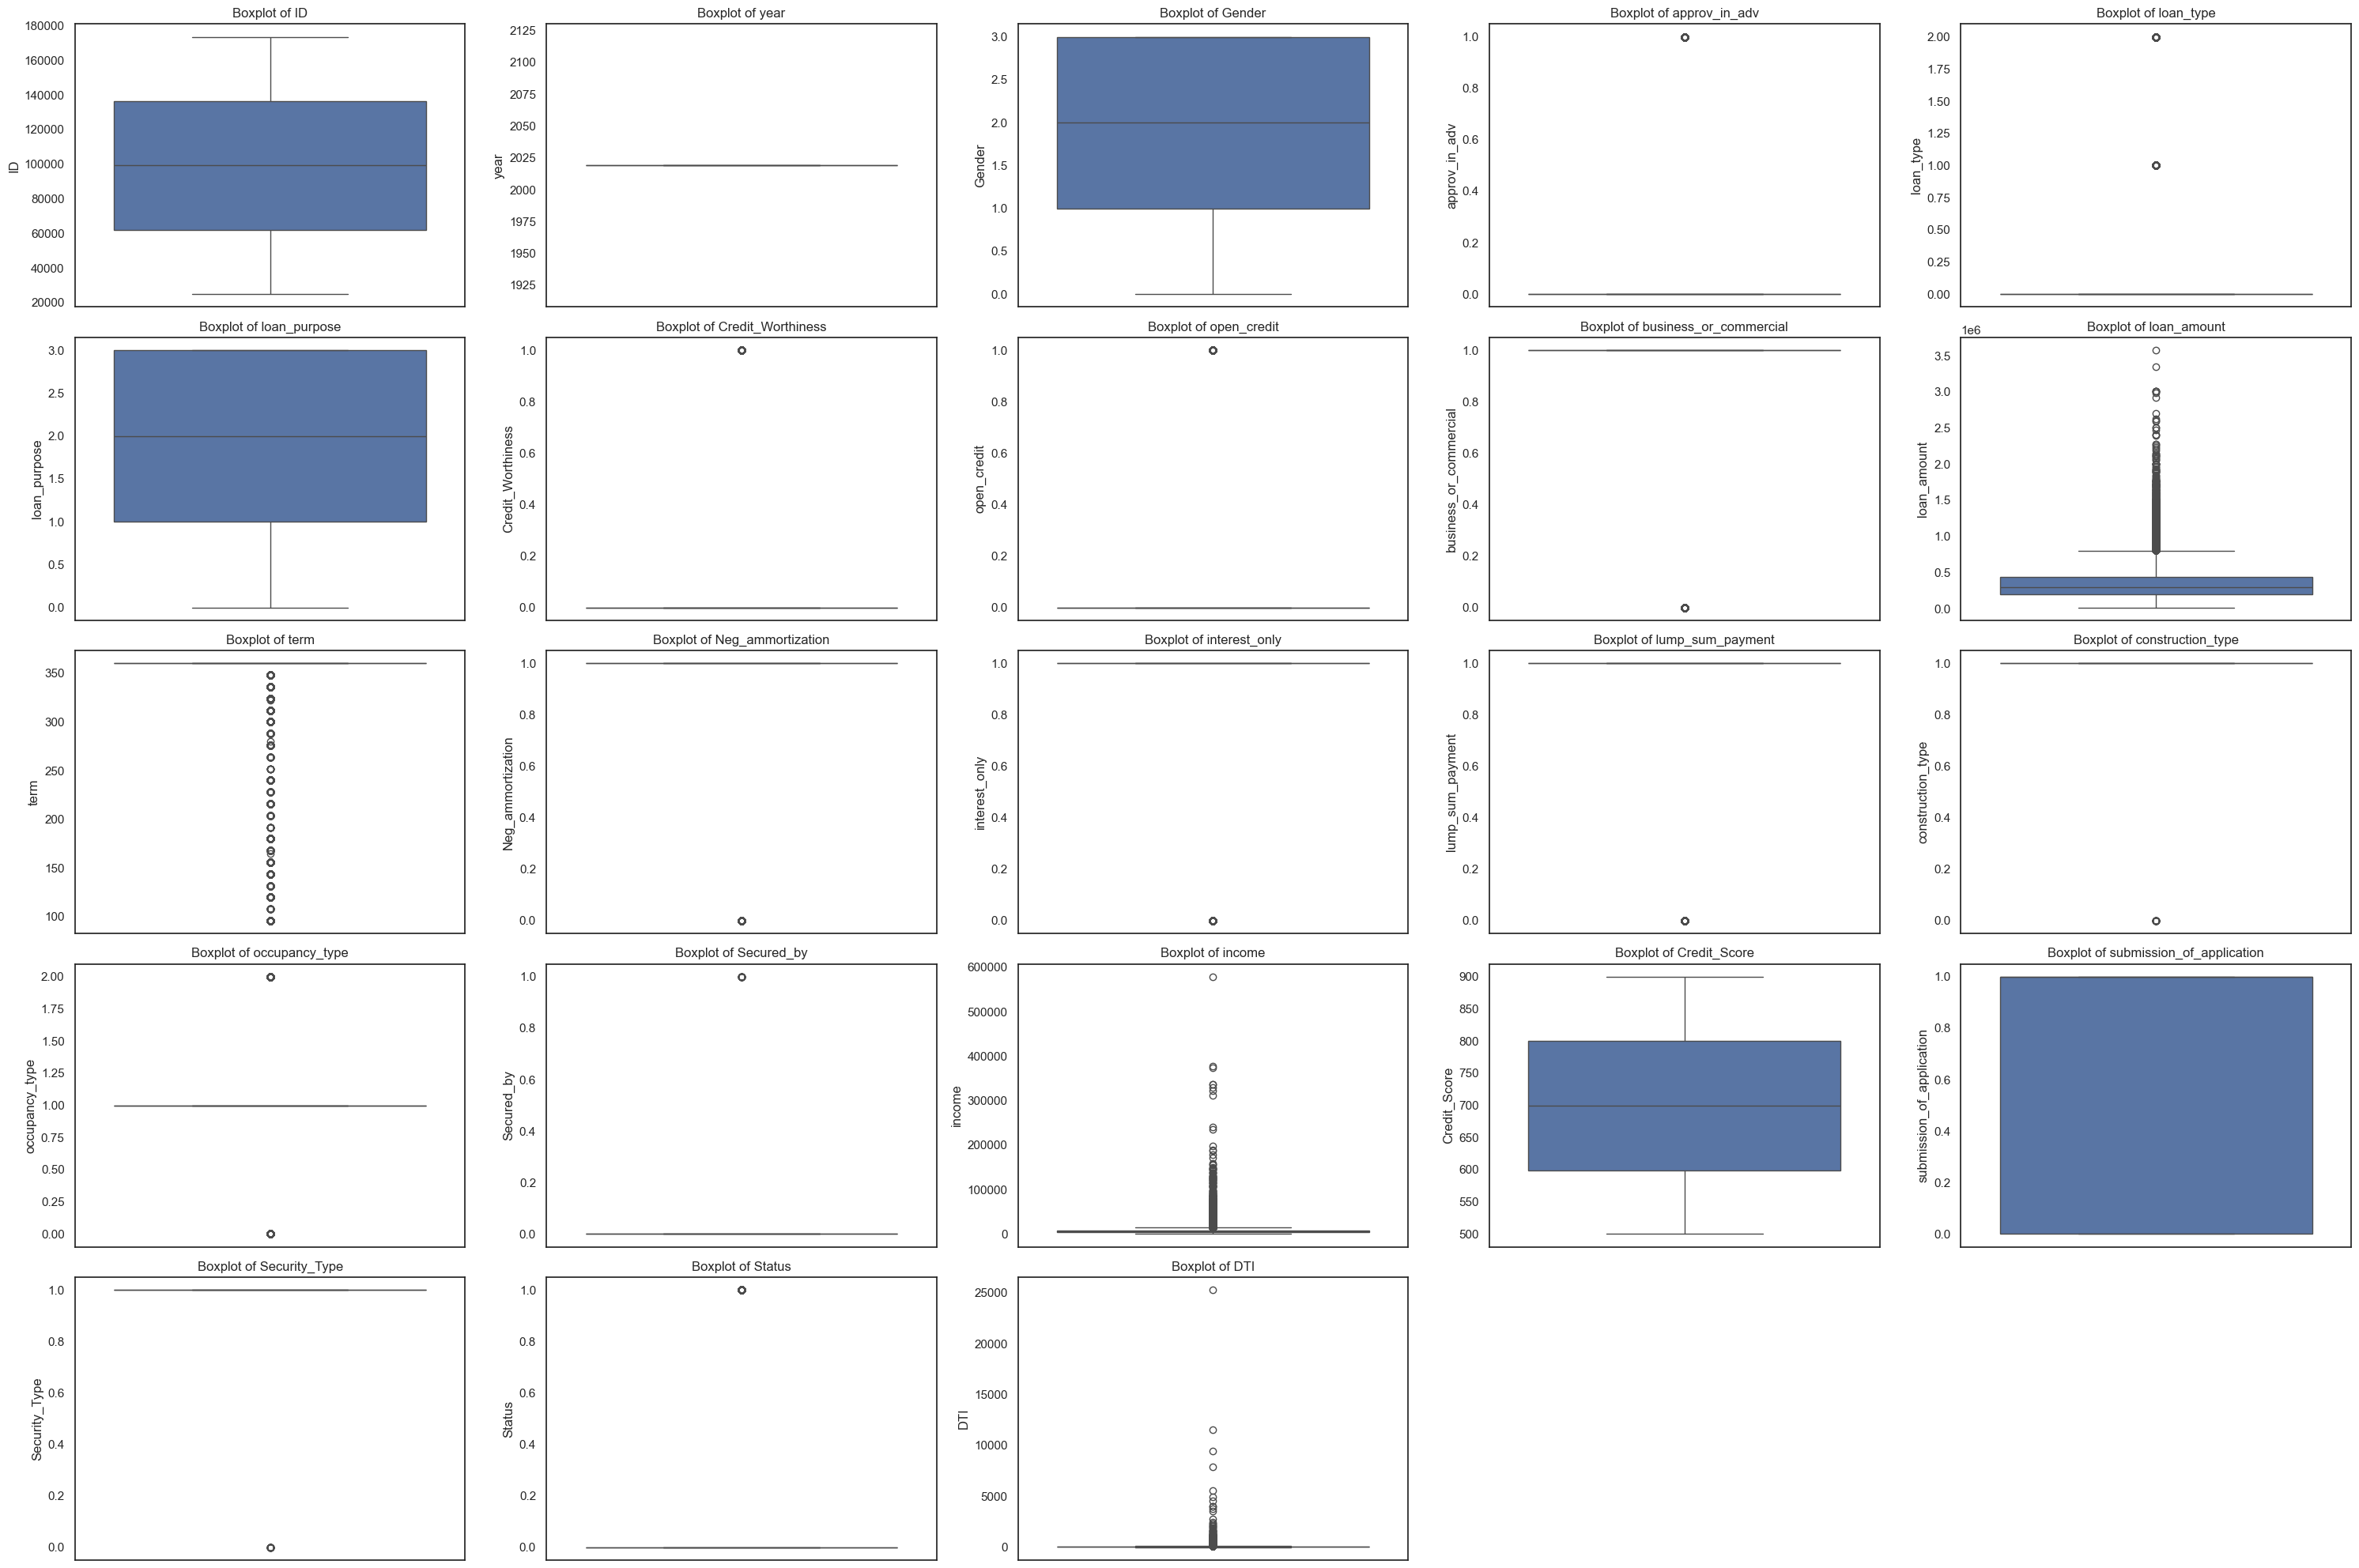

In [31]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)
num_rows = (num_columns // 5) + (num_columns % 5 > 0)
num_cols = 5 
plt.figure(figsize=(30, 20))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1) 
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout() 
plt.show()

In [32]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)
outliers = iso.fit_predict(data)
data["ISO"] = outliers
data = data[data["ISO"] == 1].drop(columns=["ISO"])

data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,income,Credit_Score,submission_of_application,Security_Type,Status,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south,DTI
0,24890,2019,3,0,0,0,0,0,1,116500,360.0,1,1,1,1,1,0,1740.0,758,1,1,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,66.954023
2,24892,2019,2,1,0,0,0,0,1,406500,360.0,0,1,1,1,1,0,9480.0,834,1,1,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,42.879747
3,24893,2019,2,0,0,3,0,0,1,456500,360.0,1,1,1,1,1,0,11880.0,587,0,1,0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,38.425926
4,24894,2019,1,1,0,0,0,0,1,696500,360.0,1,1,1,1,1,0,10440.0,602,0,1,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,66.714559
5,24895,2019,1,1,0,0,0,0,1,706500,360.0,1,1,1,1,1,0,10080.0,864,0,1,0,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,70.089286


In [38]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Fit the model
clusters = dbscan.fit_predict(data[numeric_columns])
data["DBSCAN"] = clusters
data = data[data["DBSCAN"] != -1].drop(columns=["DBSCAN"])
data.head()

,ID,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,income,Credit_Score,submission_of_application,Security_Type,Status,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south,DTI


# Scaling

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

ValueError: Found array with 0 sample(s) (shape=(0, 23)) while a minimum of 1 is required by RobustScaler.

---

# ML Models

In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop('Status', axis=1)  
y = data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.886028175329771
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     21301
         1.0       0.96      0.46      0.62      5460

    accuracy                           0.89     26761
   macro avg       0.92      0.73      0.78     26761
weighted avg       0.89      0.89      0.87     26761



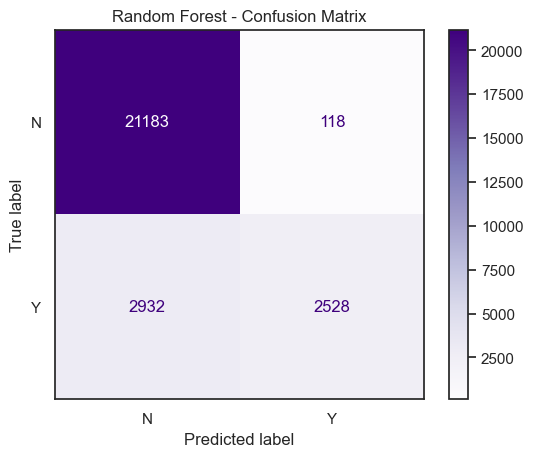

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['N', 'Y'])
disp_rf.plot(cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.show()

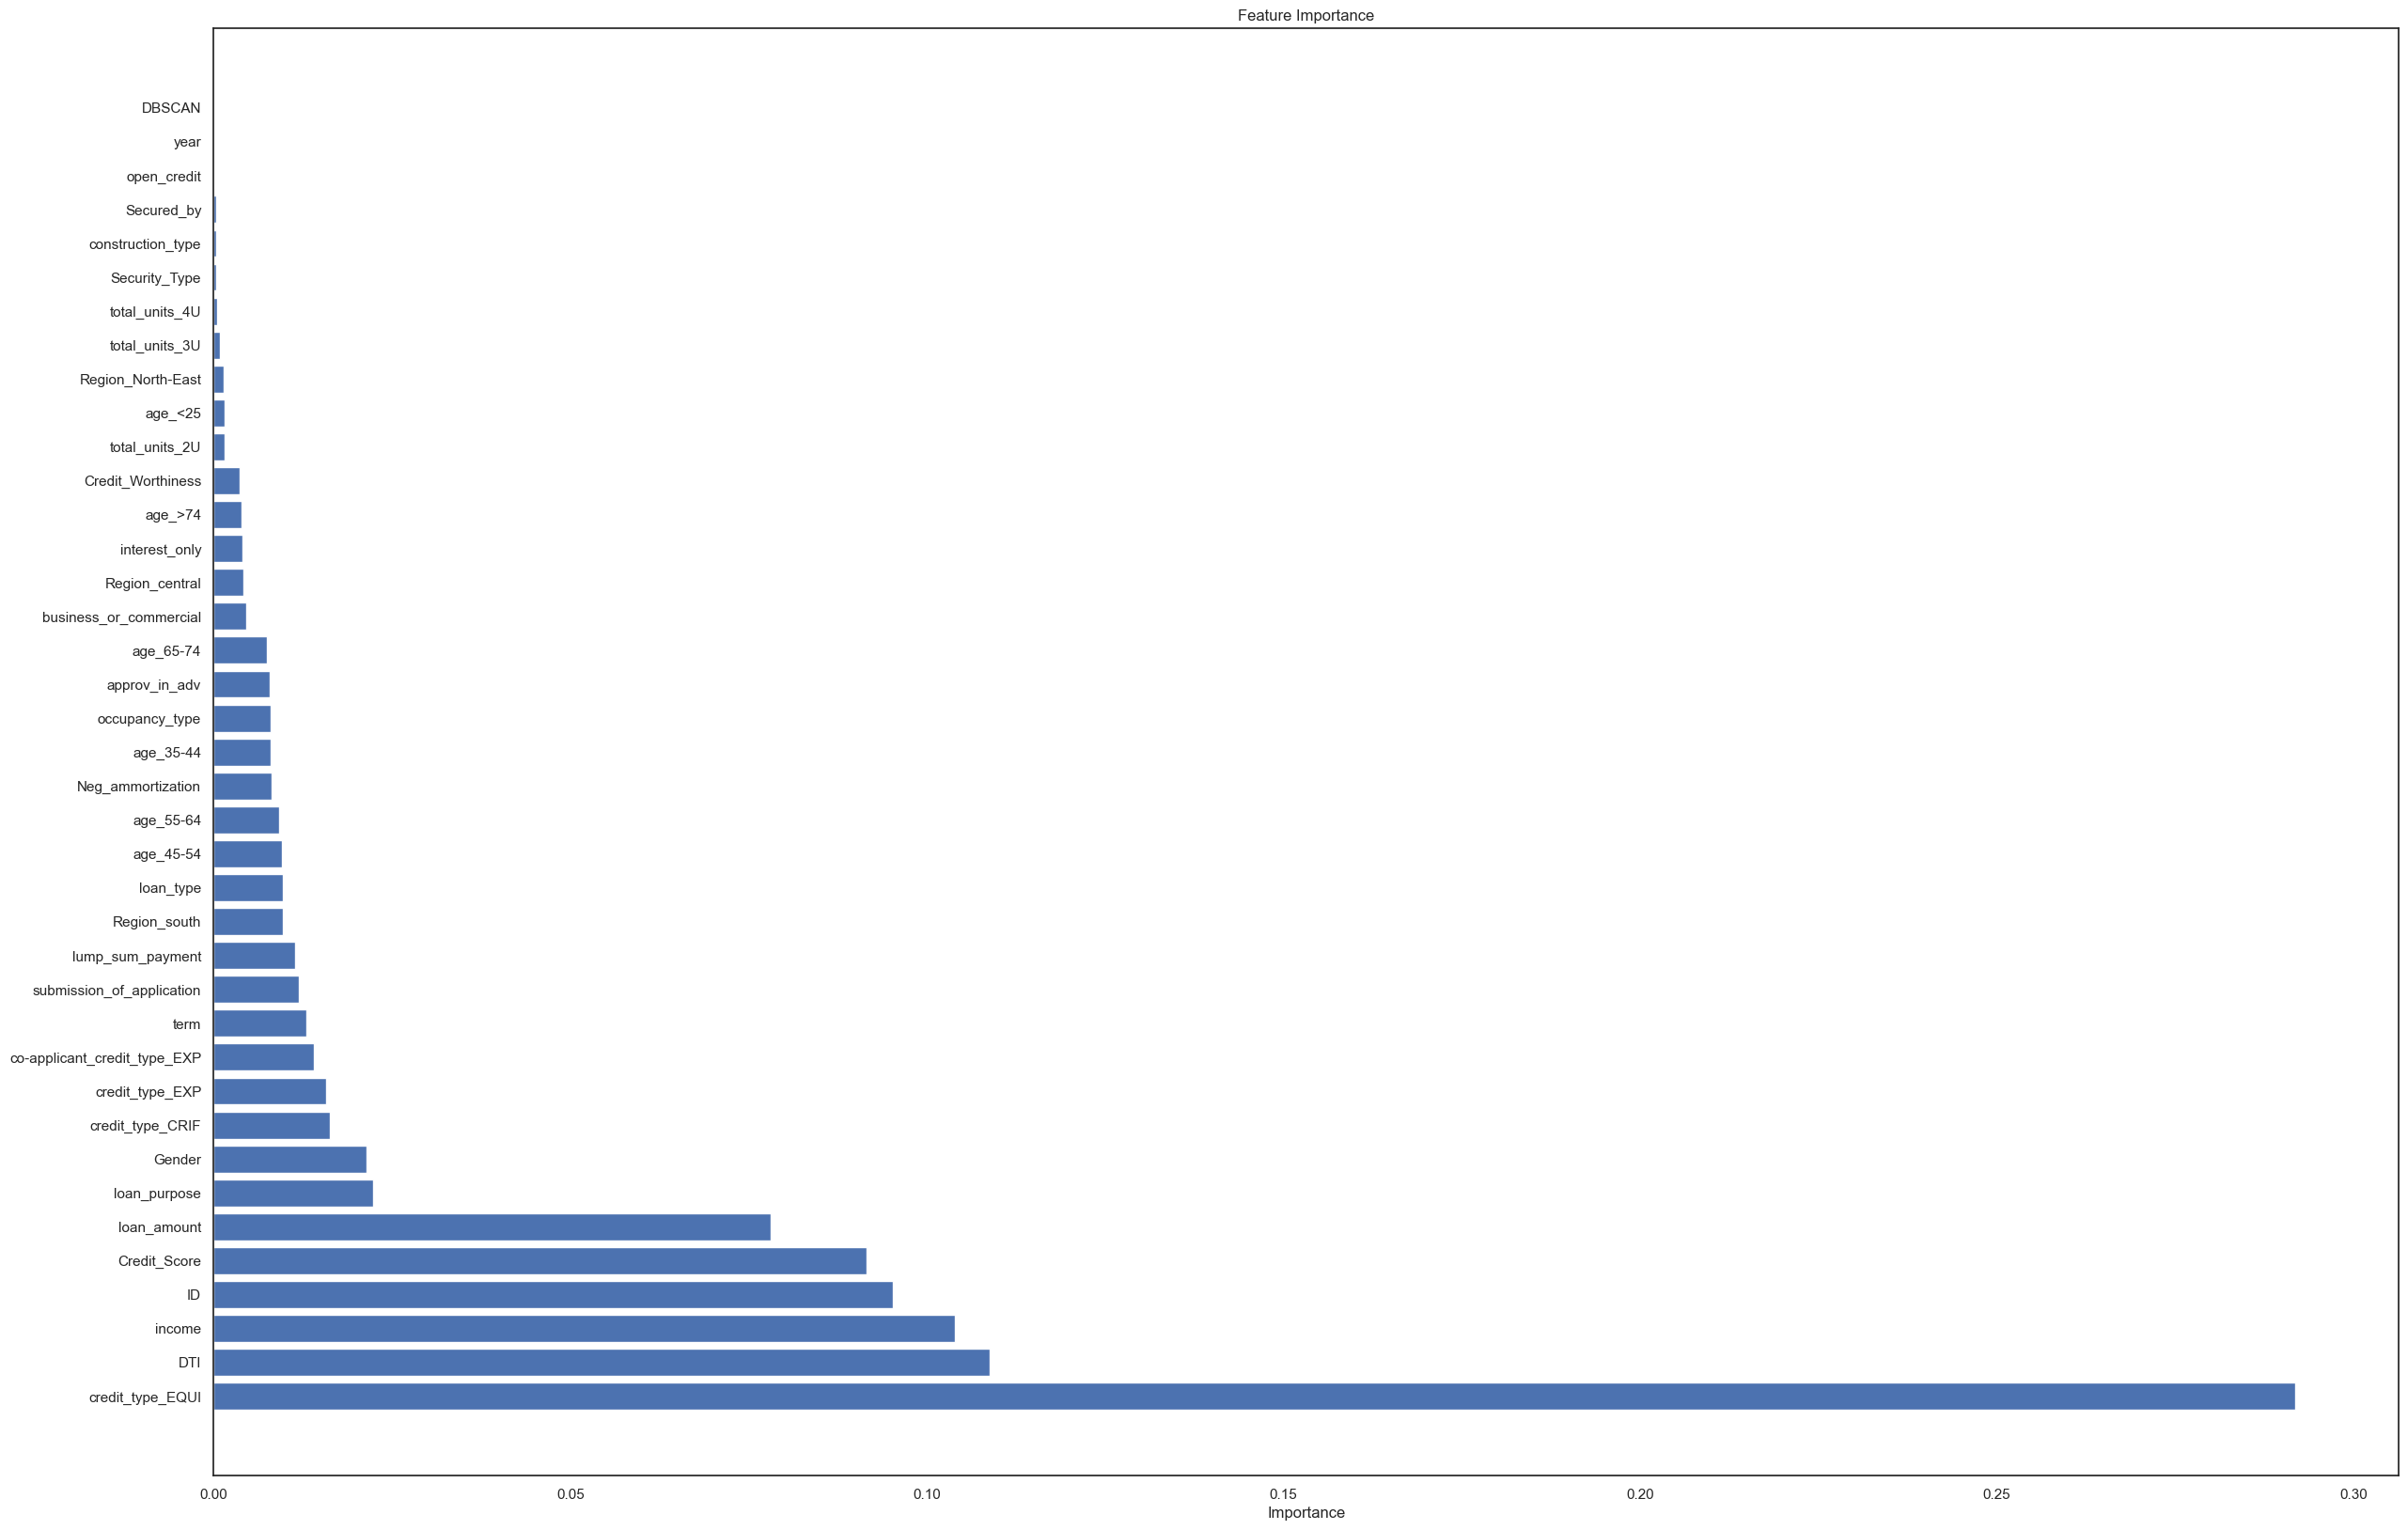

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(30, 20))
plt.title('Feature Importance')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), feature_names[indices])
plt.xlabel('Importance')
plt.show()

In [37]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
threshold = 0.4  
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("Random Forest Accuracy with Threshold Adjustment:", accuracy_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

NameError: name 'rf' is not defined

In [ ]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
threshold = 0.4  
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("Random Forest Accuracy with Threshold Adjustment:", accuracy_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

In [ ]:
cm_rf_adjusted = confusion_matrix(y_test, y_pred_adjusted)
disp_rf_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_rf_adjusted, display_labels=['N', 'Y'])
disp_rf_adjusted.plot(cmap='Purples')
plt.title("Random Forest with Threshold Adjustment - Confusion Matrix")
plt.show()

In [ ]:
# XGBoost Classifier 
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/thebekhruz/Desktop/Projects/predictive_modelling/predictive_modelling_venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <89AD948E-E564-3266-867D-7AF89D6488F0> /Users/thebekhruz/Desktop/Projects/predictive_modelling/predictive_modelling_venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['N', 'Y'])
disp_xgb.plot(cmap='Purples')
plt.title("XGBoost - Confusion Matrix")
plt.show()

In [ ]:
importances = xgb_model.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 20))
plt.title('Feature Importance - XGBoost')
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), X_train.columns[indices])
plt.xlabel('Importance')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  
model.compile(
    loss='binary_crossentropy',  
    optimizer=Adam(learning_rate=0.001),  
    metrics=['accuracy']   
)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,  
    verbose=1
)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy}")

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['No Default', 'Default']))
